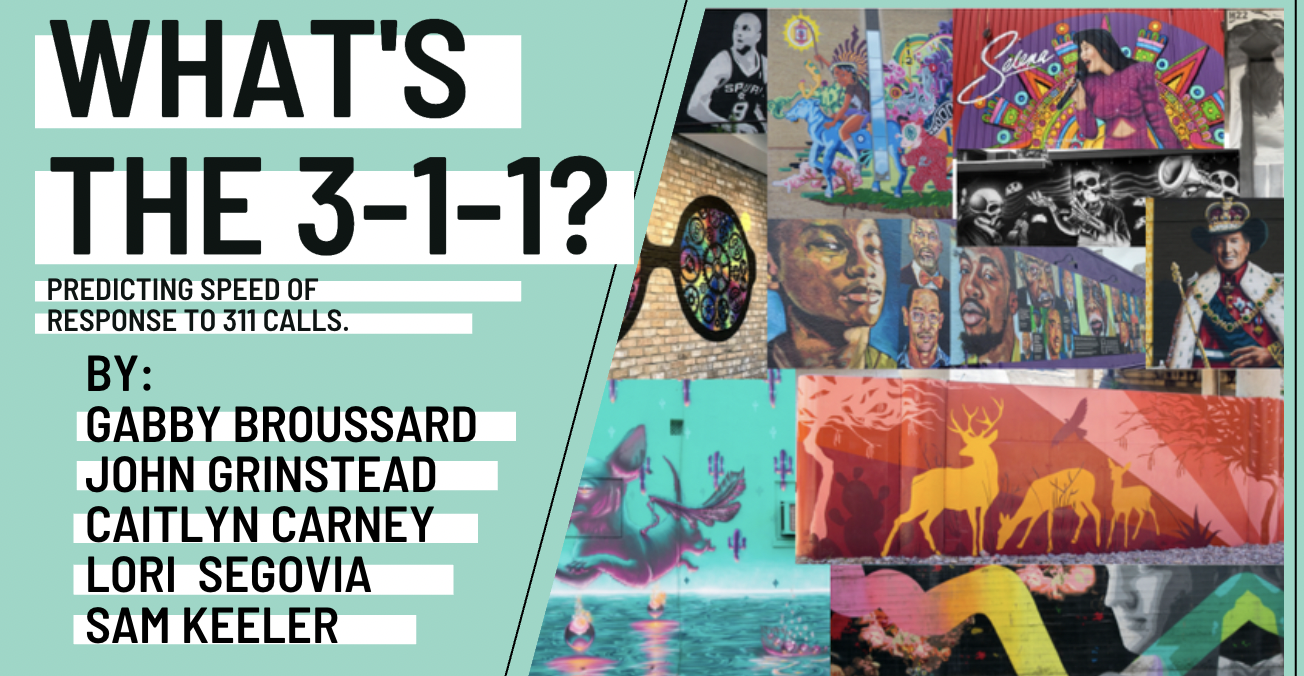

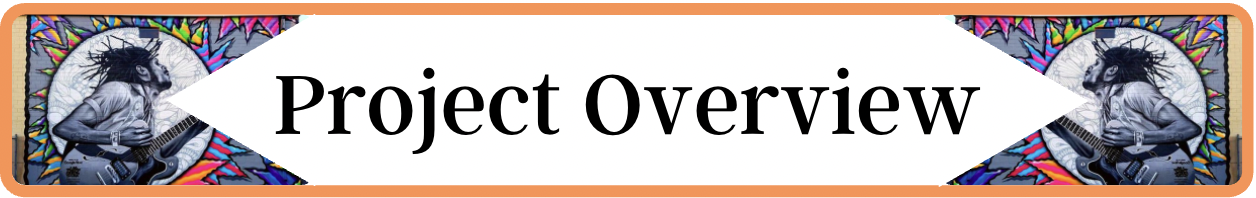

### <span style='color:black'> <span style='background :turquoise' > What Are We Doing. </span>

Using data acquired from the City of San Antonio, our team aims to create a classification model to predict the level of delay in a call's response time. From this project we want to answer what drives the level of delay and if there is a way to minimize late response times for 3-1-1 calls in our city.

### <span style='color:black'> <span style='background :turquoise' > What Are Our Goals? </span>

- Make a model to predict the level of delay in response time for a 311 call.
- See how response time is affected by different key features.
- Find the main drivers of delayed response time in San Anotnio 3-1-1 calls.

### <span style='color:black'> <span style='background :turquoise' > A Few Things to Note Before Proceeding: </span>

- How we defined each level:
    - Very early response times were when the case was open for 0-50% of its alotted resolution time.
    - Early response times were when the case was open for 50-75% of its alotted resolution time.
    - On time response times were when the case was open for 75-100.01% of its alotted resolution time.
    - Late response times were when the case was open for 100.01-1500% of its alotted resolution time.
    - Very late response times were when the case was open for 1500% or more of its alotted resolution time.

## <span style='color:black'> <span style='background :turquoise' > We Initially Asked/Hypothesized: </span>

- Is the average number of calls in an area affect the response time?
- Does the type of call in an area effect the level of delay? 
    - For example does a loose dog on the south side vs loose dog on the north side have different response times
- Does the specific location effect the delay time?
- Do number of priority level calls differ throughout the city?
- Does category/department affect response time?
- Is response time for issue X different between geographical location Y when compared to the average response time? (or other geographical location?)
- Is there a link to which form of reporting is responded to quickest and slowest?

## <span style='color:black'> <span style='background :turquoise' > We Found That: </span>

- We found that:
    - XCOORD and YCOORD values are made using a geospatial coordinate system that is exclusive to Texas
    - District 0 is the district used for cases that are out of jurisdiction
    - Not all zipcodes are recorded therfore must be dropped.
        - 78210 zip has the highest amount of late cases, 78052, 78101, 78124, 78163 have the lowest amount of late cases
    - Dead calls are not logged by call center employees.
    - Customer service has the worst response times of all the departments.
        - They only perform on time in District 5.
    - Department, call reason, and number of days given for a resolution were found to be major drivers of response time.
    - District was a driver, but only when paired with department or call reason.

In [5]:
import pandas as pd
from wrangle import first_iteration_clean_311, split_separate_scale
from explore import dbad_anova_test, days_open_by_month_anova_test, chi2, upper_lower_mw_testing, sa_map, resolution_days_due_vs_days_before_or_after_due
import wrangle
import explore

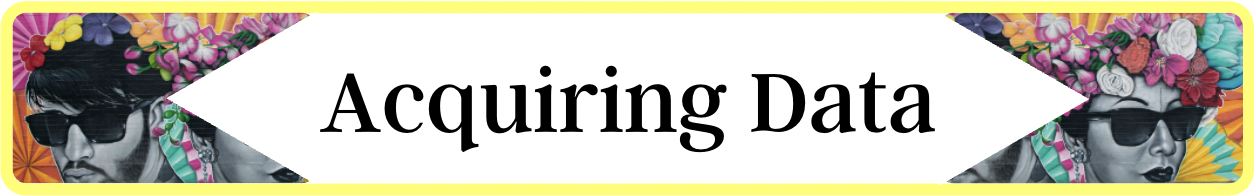

## <span style='color:black'> <span style='background :turquoise' > Acquire the Data: </span>

- This data was acquired from the City of San Antonio Website
    - https://data.sanantonio.gov/dataset/service-calls/resource/20eb6d22-7eac-425a-85c1-fdb365fd3cd7 

In [2]:
df = pd.read_csv('service_calls.csv')
df.head(3)

Category      CASEID OPENEDDATETIME   SLA_Date CLOSEDDATETIME  \
0              Graffiti  1010444245      8/15/2012  8/30/2012            NaN   
1  Property Maintenance  1010888252       6/6/2013   8/9/2013            NaN   
2  Property Maintenance  1010966128      7/19/2013  9/23/2013            NaN   

  Late (Yes/No)                       Dept                 REASONNAME  \
0           YES  Code Enforcement Services                   Graffiti   
1           YES  Code Enforcement Services  Code Enforcement (IntExp)   
2           YES  Code Enforcement Services  Code Enforcement (IntExp)   

                           TYPENAME CaseStatus    SourceID  \
0          Graffiti Public Property       Open  Web Portal   
1             Alley-Way Maintenance       Open  Web Portal   
2  Junk Vehicle On Private Property       Open  Web Portal   

                               OBJECTDESC  Council District     XCOORD  \
0   600  NOGALITOS ST, San Antonio, 78204                 5  2125683.0   
1  6043  CASTLE QUEEN, San Antonio, 78218                 2  2169702.0   
2        842  KIRK PL, San Antonio, 78226                 5  2116192.0   

       YCOORD Report Starting Date Report Ending Date  
0  13695548.0            5/15/2020          5/15/2021  
1  13725769.0            5/15/2020          5/15/2021  
2  13692260.0            5/15/2020          5/15/2021

## <span style='color:black'> <span style='background :turquoise' > We can insert a fun little picture here to add some levity</span>

**if we decide to add picture we can add some fun text to tie in the picture and the upcoming cleaning.**

This data needs some work!
- There are a fair amount of null values.
- There are a lot of call reasons that can be merged into one call reason.
- The target variable needed to be made.
- We wanted to make the column names easier to understand.
- Add extra data ponts found from Council district profiles
    - Fund at: https://sa2020.org/city-council-profiles

*For the code used to acquire the data please see wrangle.py file in our github repository*

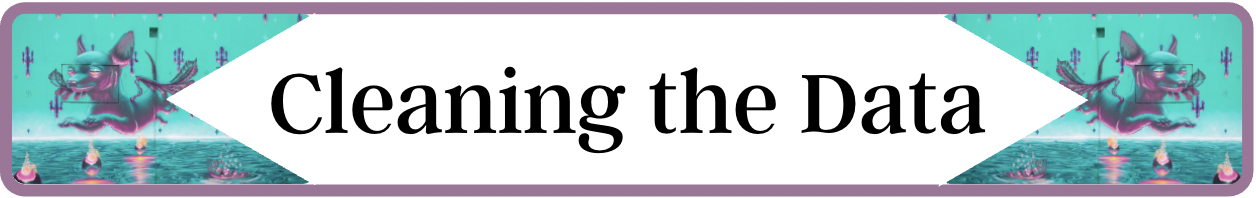

In [3]:
df= first_iteration_clean_311(df)

### <span style='color:black'> <span style='background :turquoise' > Now that's what I call clean!

- We cleaned the data by doing the following:
    - Made the index case id
    - Handled the null values
    - Removed features that are not needed
    - Create new features such as:
        - days_open
        - resolution_days_due
        - days_before_or_after_due
        - pct_time_of_used
        - voter_turnout_2019
        - num_of_registered_voters
        - per_capita_income
    - Create dummy variable columns for district
    - Renamed the features to make them easier to understand and to make calling them later easier
    - Merge some values that go hand in hand from reason for calling
    - Extract zip code from the address
    - Created target variable level of delay
        - Made bins to categorize the level of delay. 
            - The categories varied with each iteration but generally were Very Early, Early, On Time, Late, and Very Late.

Just need to split it before going into our exploration.

In [4]:
train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test, train_scaled, validate_scaled, test_scaled = split_separate_scale(df, stratify_by= 'level_of_delay')

*For more specifics on the code used for cleaning and splitting please see wrangle.py file in our github repository*

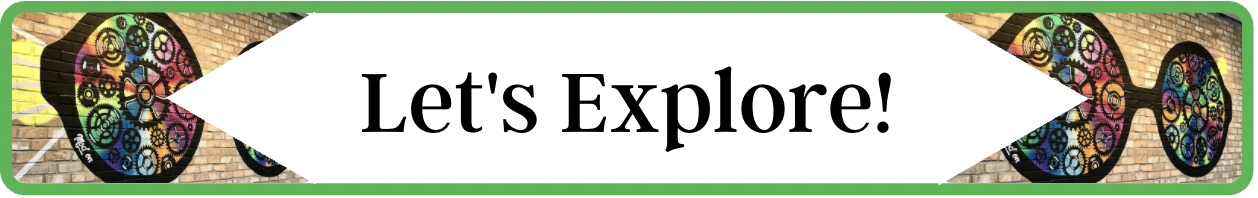

*All code used for exploration can be found in the explore.py file in our github repository*

### <span style='color:black'> <span style='background :turquoise' > Can we visualize the districts of the city by case location?

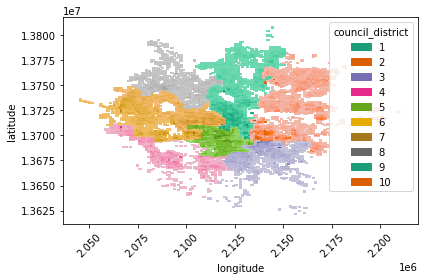

In [6]:
sa_map(train)

#### Takeaways:
- Using the latitude and longitude provided by the data we can see a rudimentary map of the city and the distribution of the council districts we will be looking at

___

### <span style='color:black'> <span style='background :turquoise' > Is there a relationship between how much time a case has to be resolved and how early or late the case is?

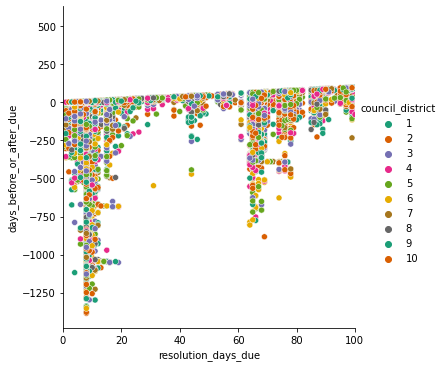

In [5]:
resolution_days_due_vs_days_before_or_after_due(train)

#### Takeaways:
- There does appear to be a linear correlation between how many days a task is given to be accomplished and how early a case can be closed before it is due
- The less time a case is assigned to be resolved, the more likely the case will be resolved early
- The more time a case is assigned to be resolved, the more likely the case will be resolved late
- This goes against our assumption that having more time would allow for the case to be resolved before the expected time

___

### <span style='color:black'> <span style='background :turquoise' > Is there is difference in level of delay for waste (most common reason for calls) between district 3 (largest southside district) and district 8/9 (wealthiest sa district)?

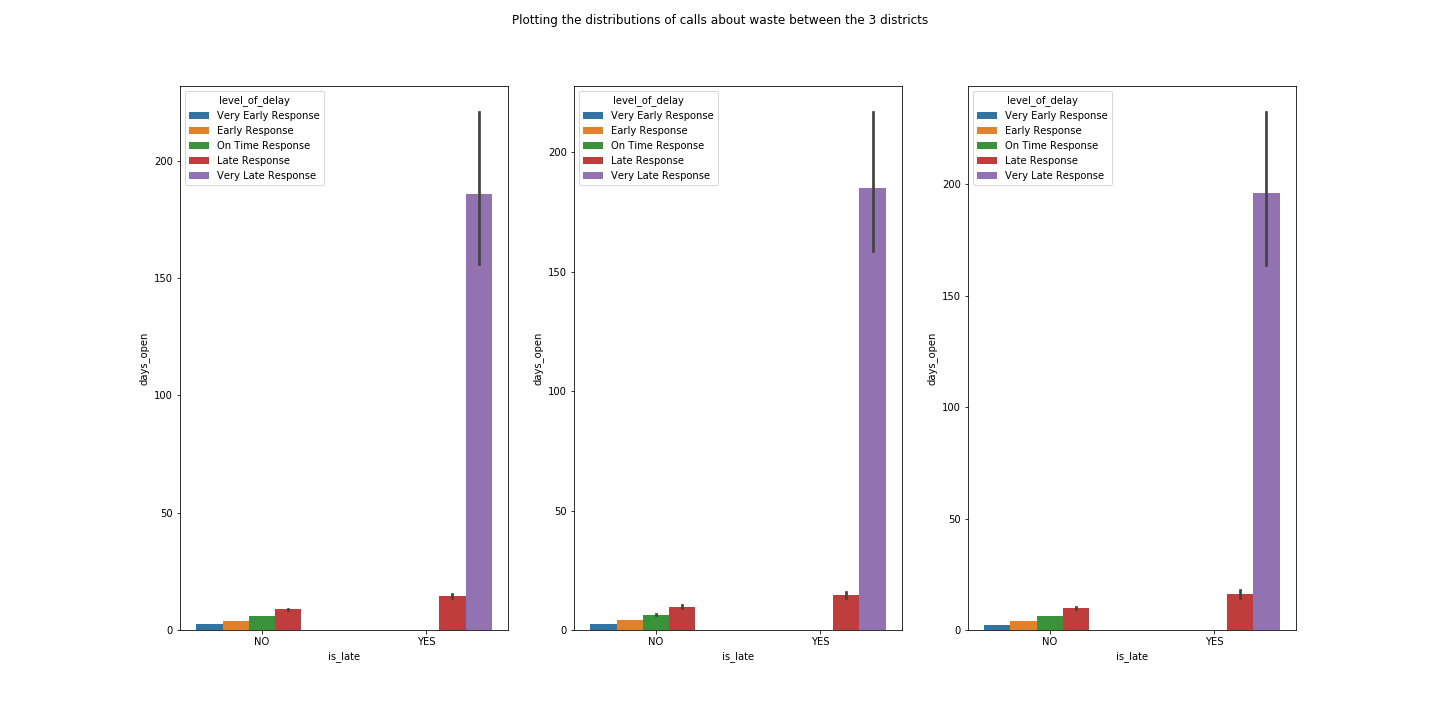

#### <span style='color:black'> <span style='background :turquoise' > What about for code enforcement in the same 3 areas? 

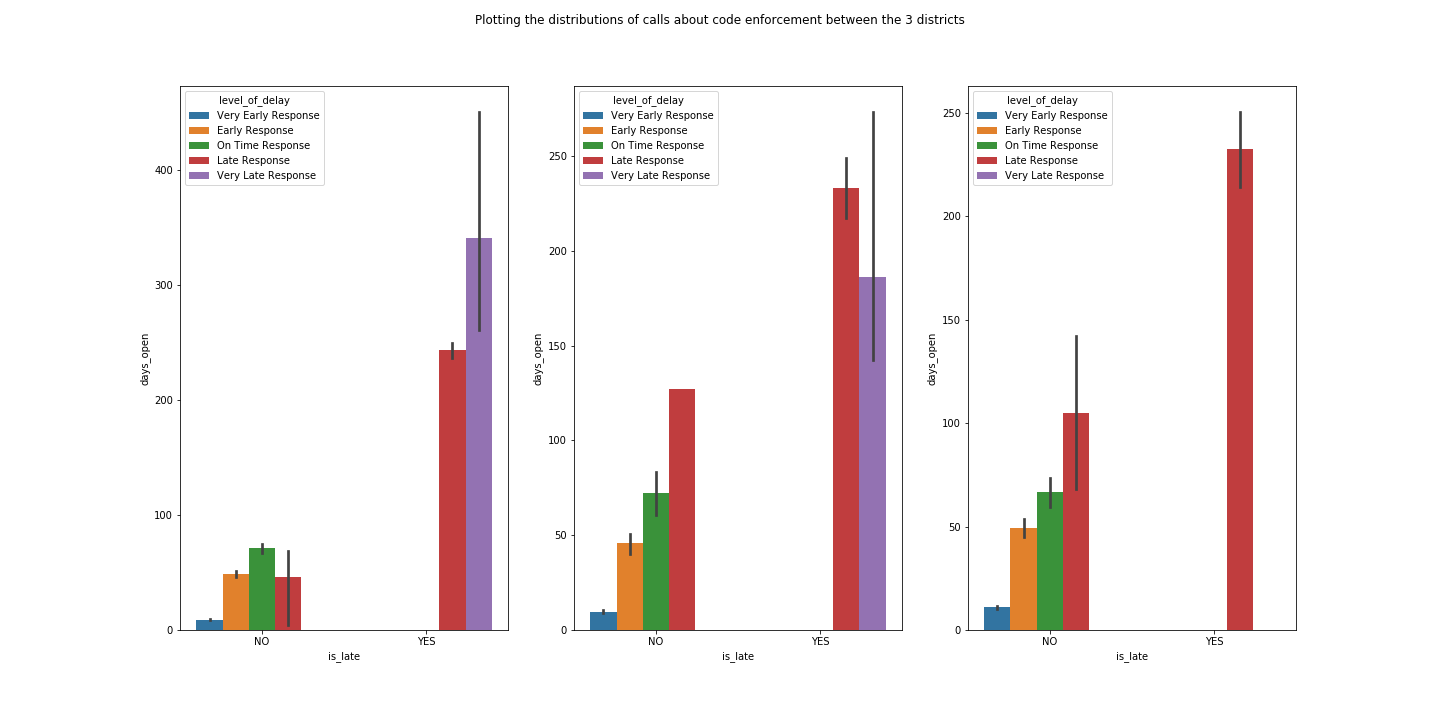

#### <span style='color:black'> <span style='background :turquoise' > What about for traffic cases in the same 3 areas? 

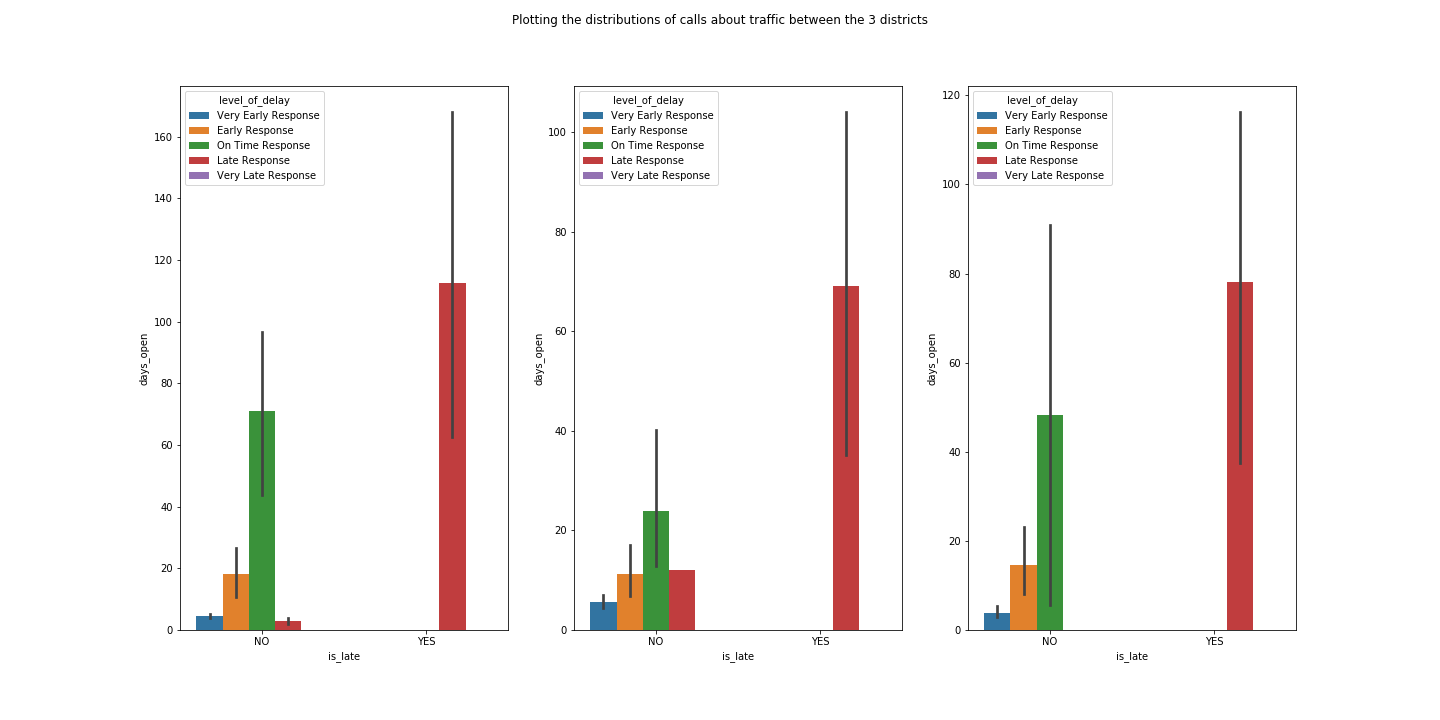

#### <span style='color:black'> <span style='background :turquoise' > What about for streets in the same 3 areas? 

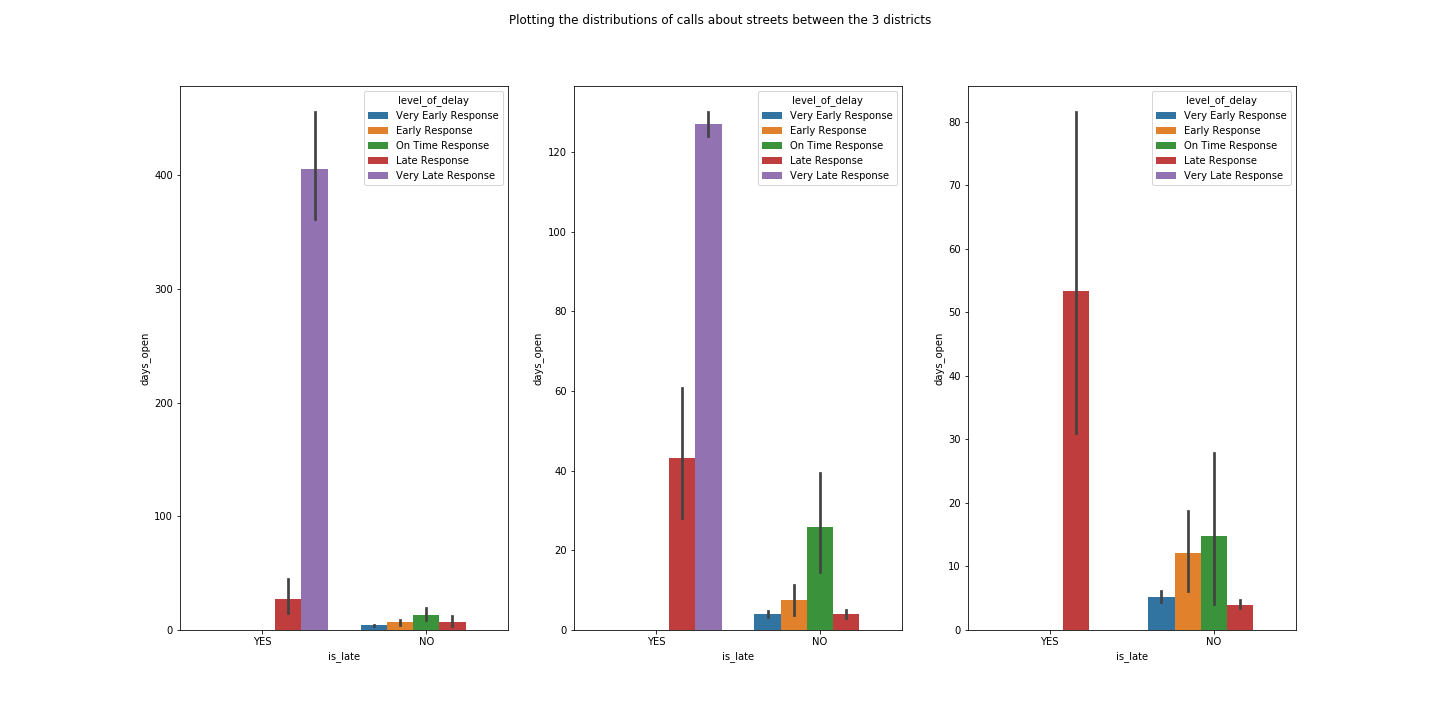

#### Takeaways:
- When comparing waste calls (most common reason for call) between districts 3 (largest southside district), 8 and 9 (northside-wealthier districts), district 9 had the highest rate of extremely late response for waste pickup.
- BUT district 3 had the highest mean for days open and district 9 had the lowest mean for days open.
- Code enforcement had no very late responses for district 9. However, district 9 had more late responses than districts 3 and 8.
- Traffic has no very late responses in any district and their late responses are about equal throughout all 3 districts.
- For streets, district 3 has the leasts amount of early and on time responses. Even though districts 8 and 9 have more late cases, their rate of having cases solved early or on time is higher.

### <span style='color:black'> <span style='background :turquoise' > East Region Level of Responses

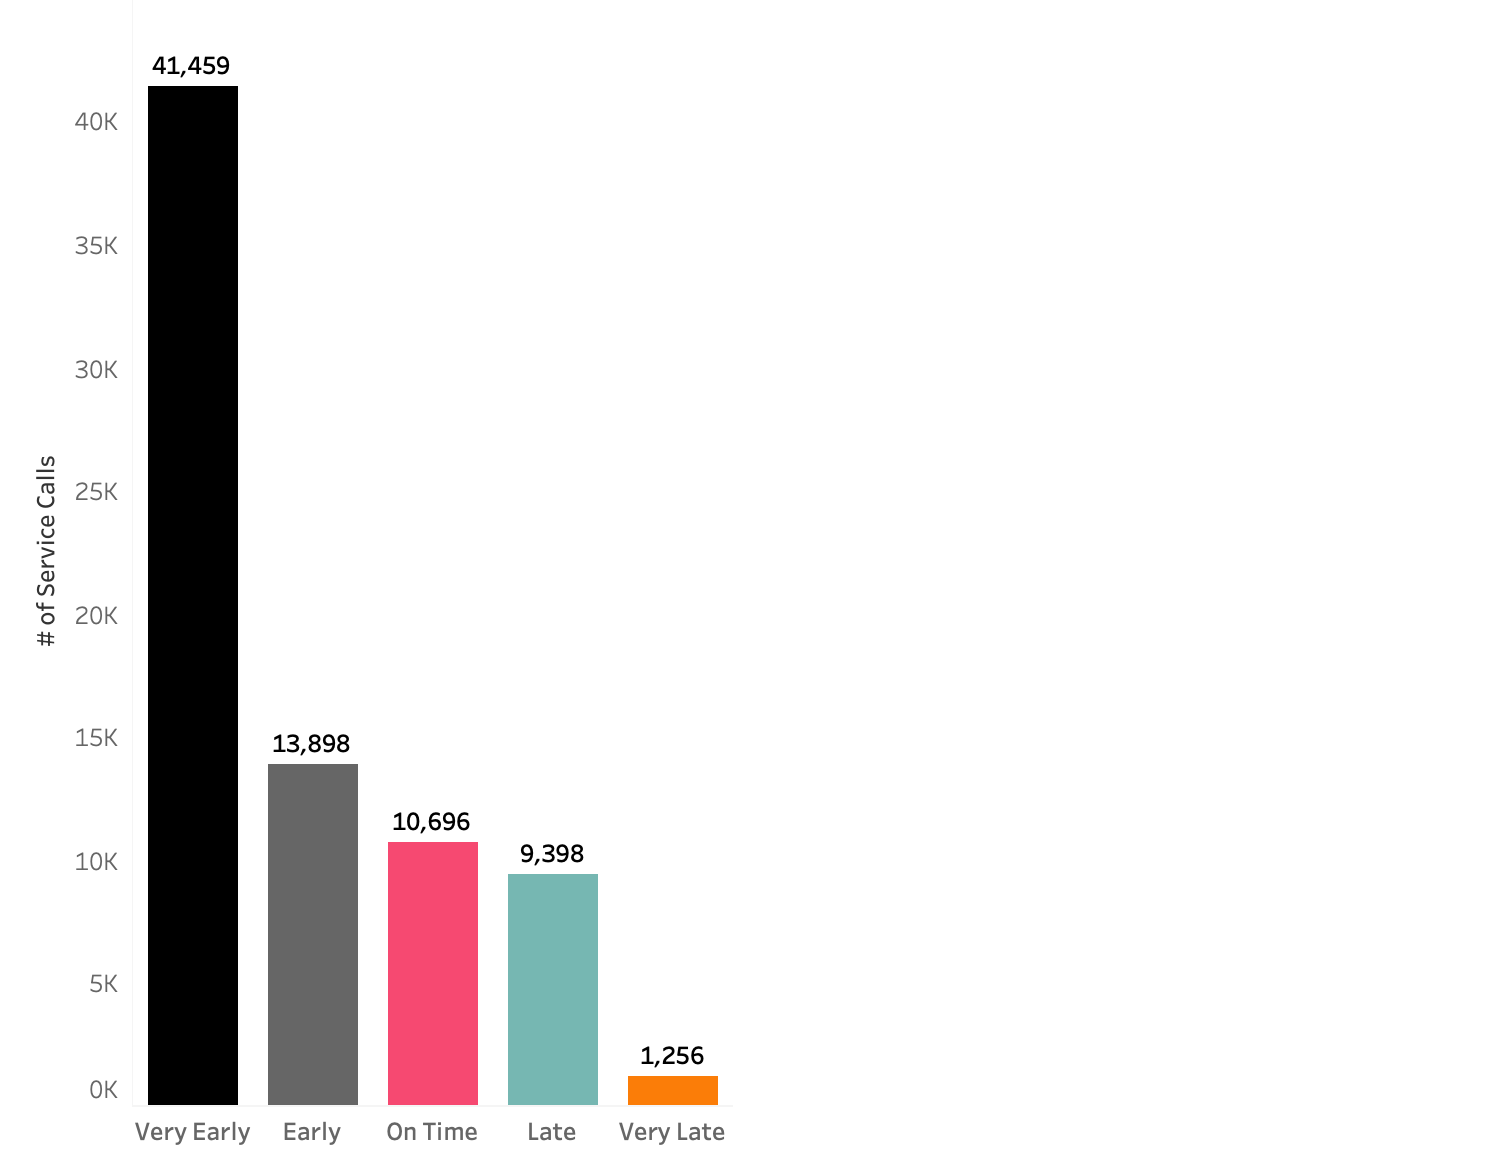

#### Takeaways:
- The East region is comprised of council districts 2 and 10 and represents about 21% of the dataset . 
- This region has a total of 66k on time responses and 11k late responses.
- This region has the slowest average response time with an average response across all service calls of 4 days. 

### <span style='color:black'> <span style='background :turquoise' > South Region Level of Responses

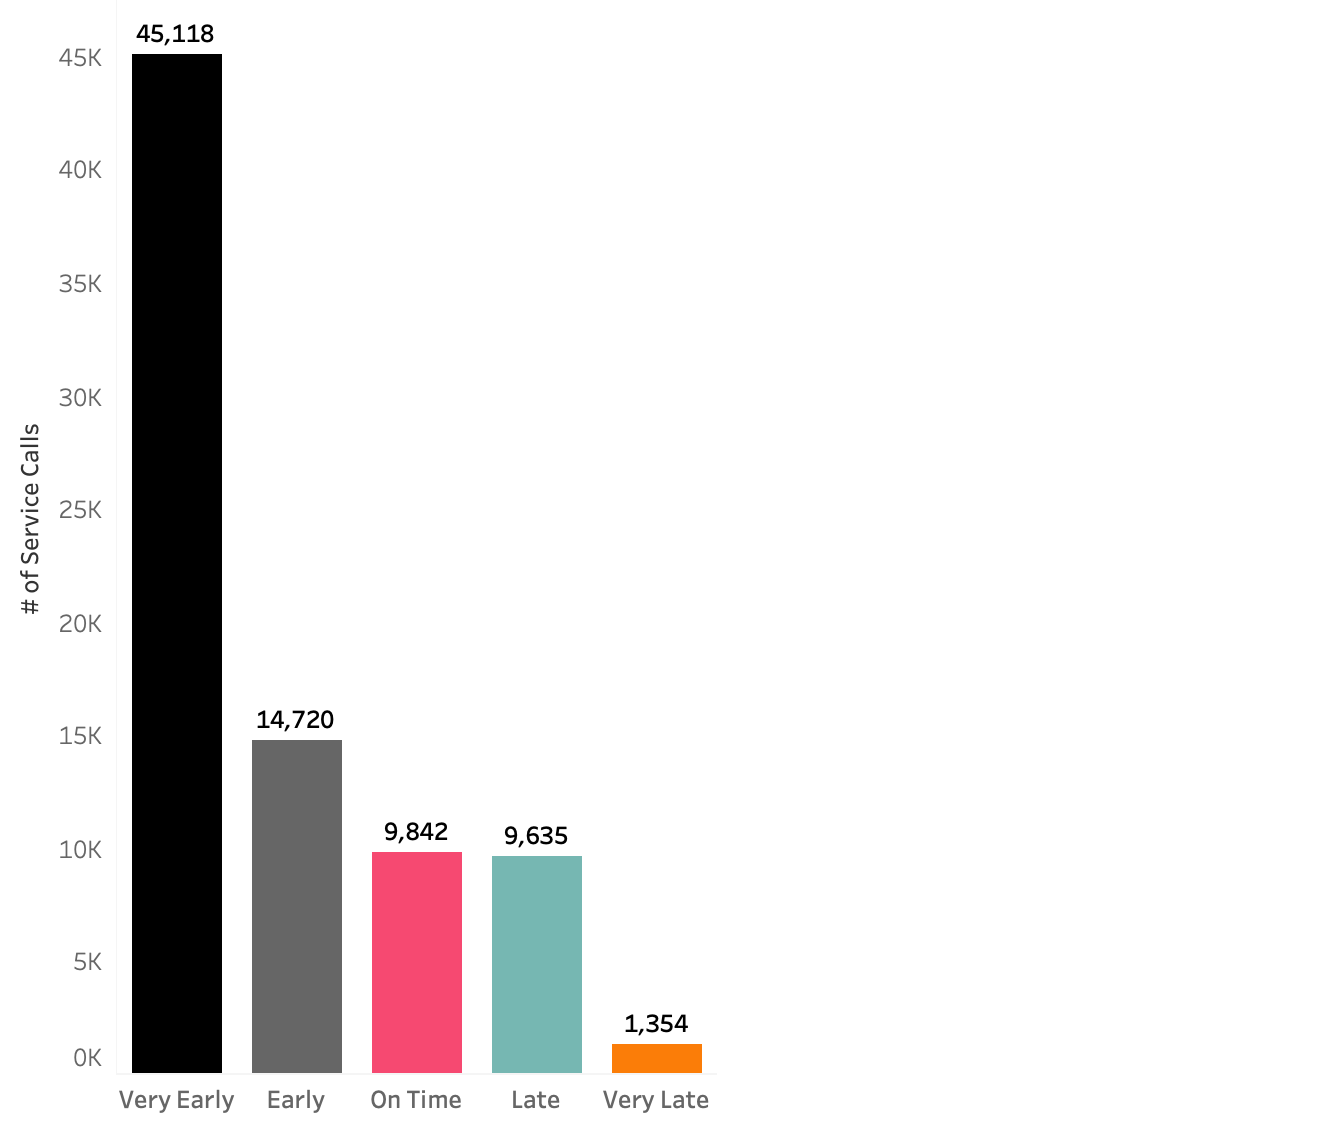

#### Takeaways:
- The south region which is comprised of council districts 3 and 4, representing 23% of our dataset.  
- This region has a total of 70k on time responses and 11k late responses.
- The average response time across the entire region is 5 days.

### <span style='color:black'> <span style='background :turquoise' > West Region Level of Responses

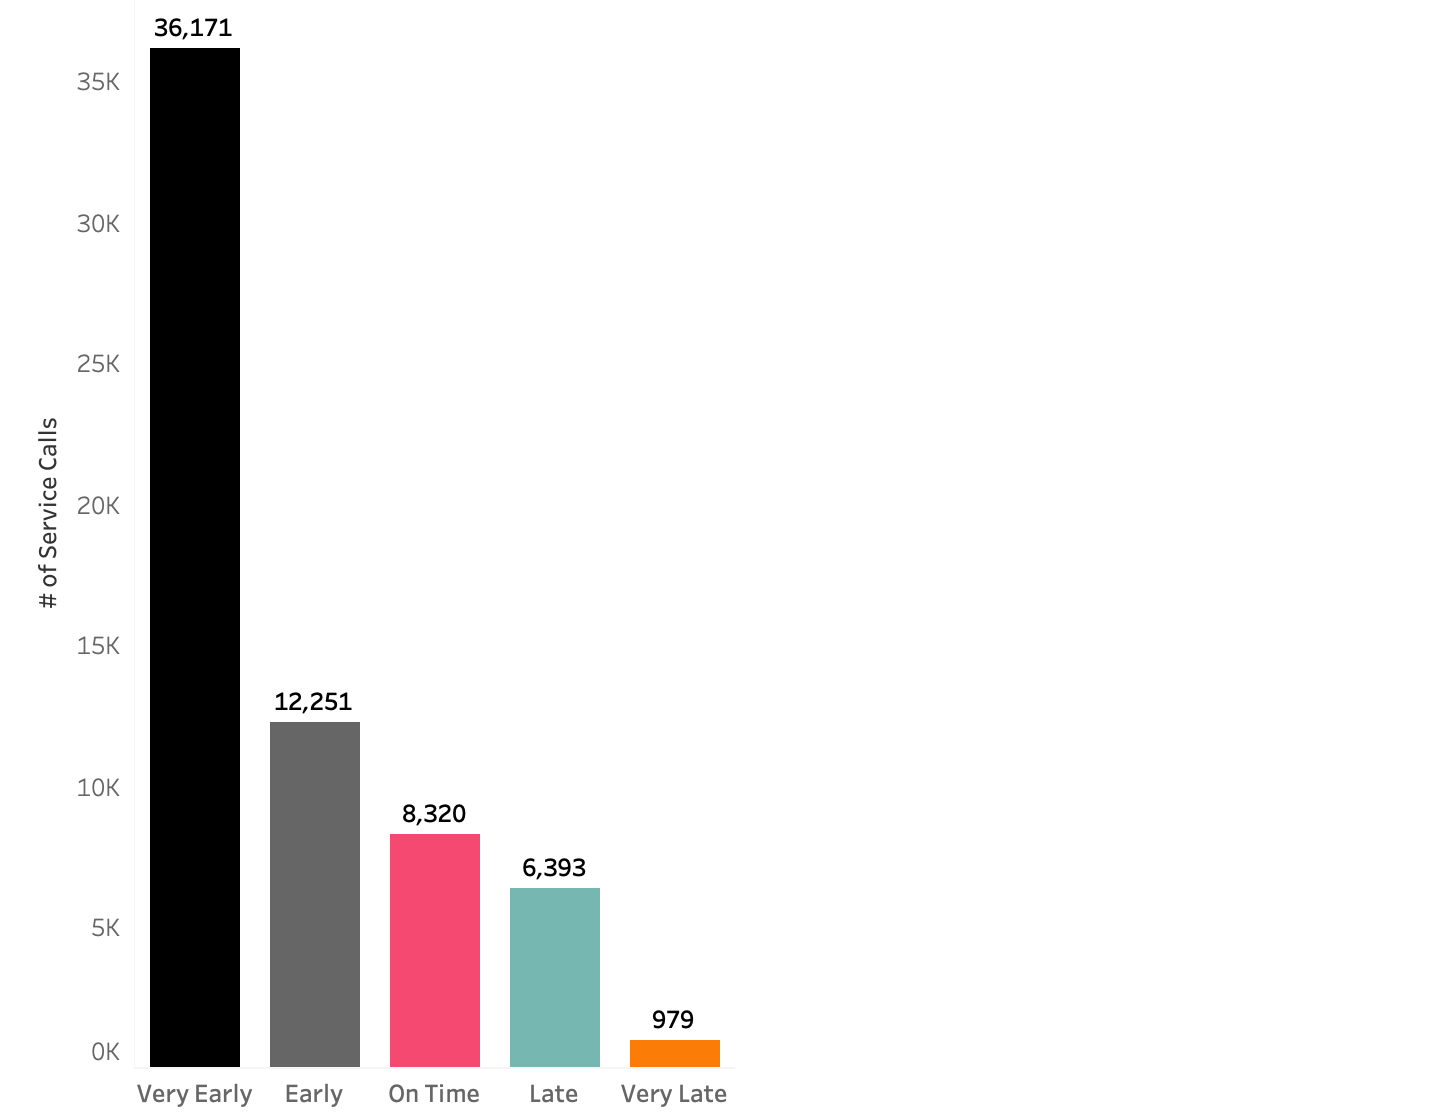

#### Takeaways:
- The west region is comprised of council districts 6 and 7 and makes up 18% of our data. 
- This region has a total of 57 k on time responses and 7k total late responses.
- The average response time for this region is 8 days, which is doubled when compared to south and east regions. 
- This is the second smallest region (in square miles) 


### <span style='color:black'> <span style='background :turquoise' > North Region Level of Responses

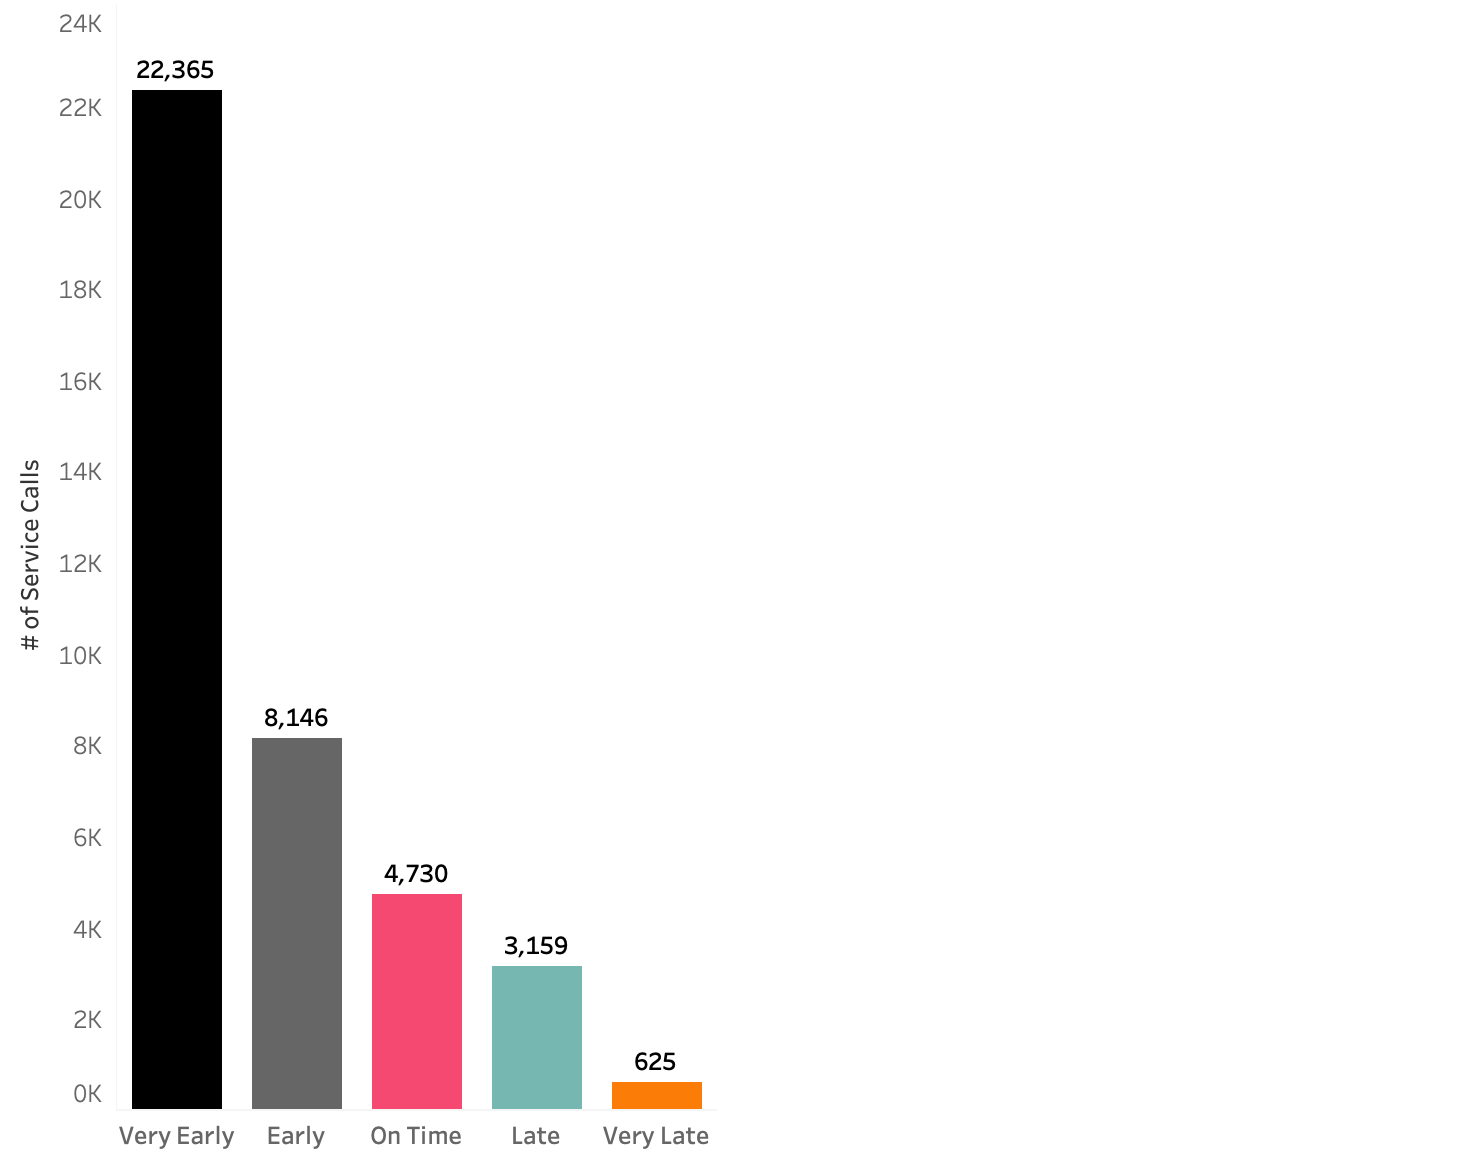

#### Takeaways:
- The North region is comprised of council districts 8 and 9 and represents 11% of our data.  
- This region has a total of 35k on time responses and 4k total late responses.
- The average response time for this region is 9 days.
- This region has the least amount of late responses and the greatest amount of early responses. 

### <span style='color:black'> <span style='background :turquoise' > Central Region Level of Responses

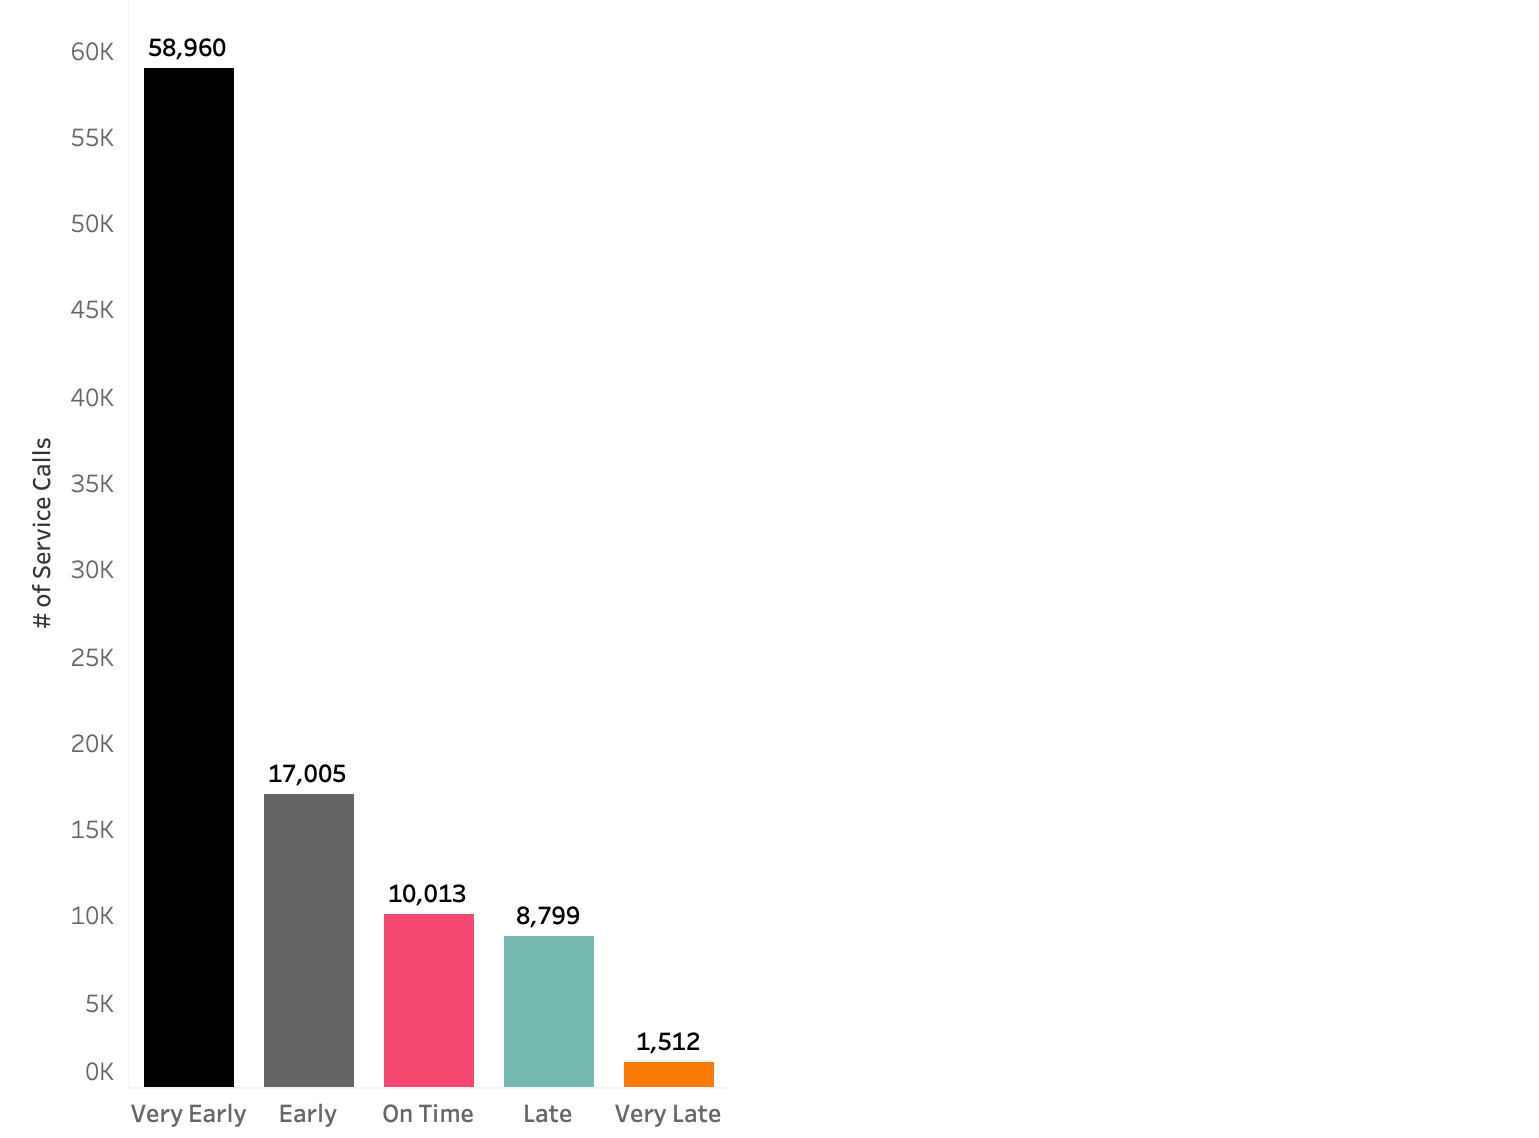

#### Takeaways:
- Council districts 1 and 5 make up the central region, which is the smallest in area, but makes up the biggest proportion of our data, holding 27% of the service calls received.  
- This region has the highest level of very early responses.  
- The average response time for this region is 14 days, which means this region, on average, completed the service requested 14 days ahead of the due date.

___

### <span style='color:black'> <span style='background :turquoise' > Is Late Column Labels Cases Completed The Same Day as Late

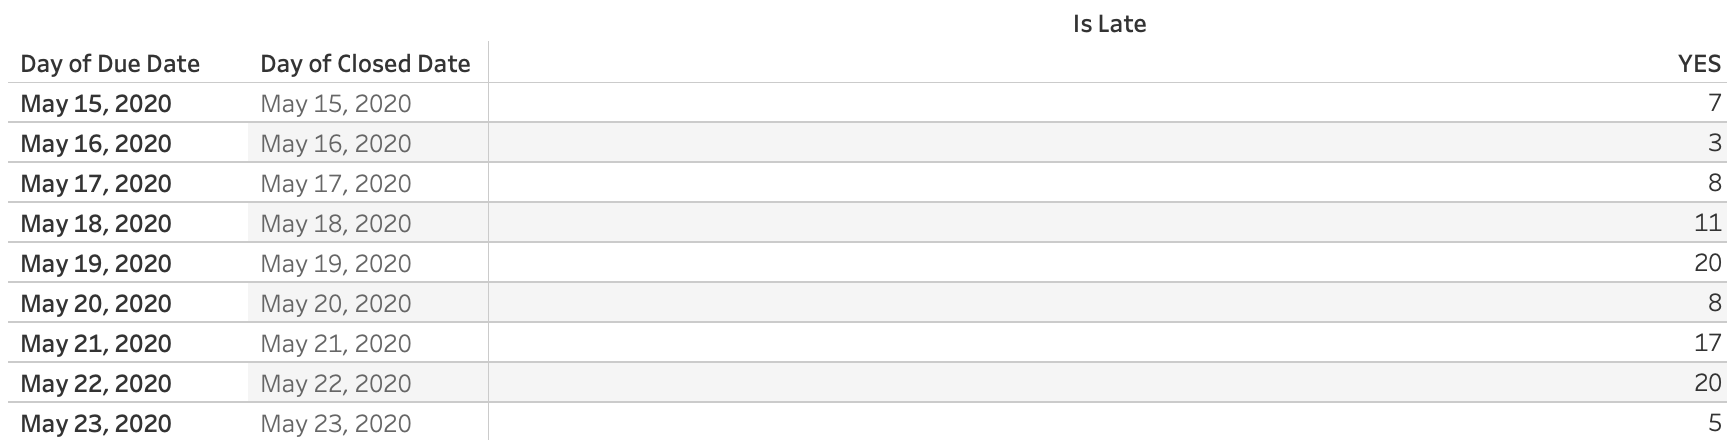

#### Takeaways:
- Upon exploration of levels of responses, we found that the current "Is Late" column mislabels cases completed on the due date as "late".

___

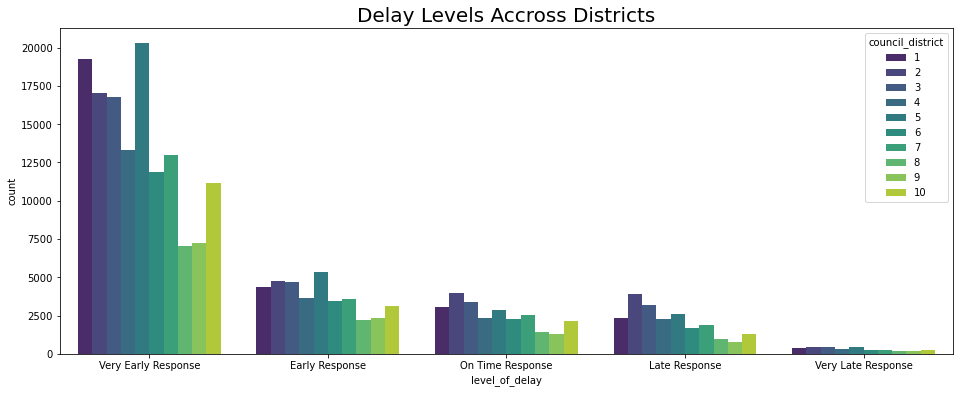

In [7]:
explore.plot_response_by_district(train)

#### Takeaways:
- We can see a downward trend for each district as the level of delay gets later and later.
- There is a spike in late responses for each district, but not a huge one.
- Very early responses are far more common than any other level of delay

___

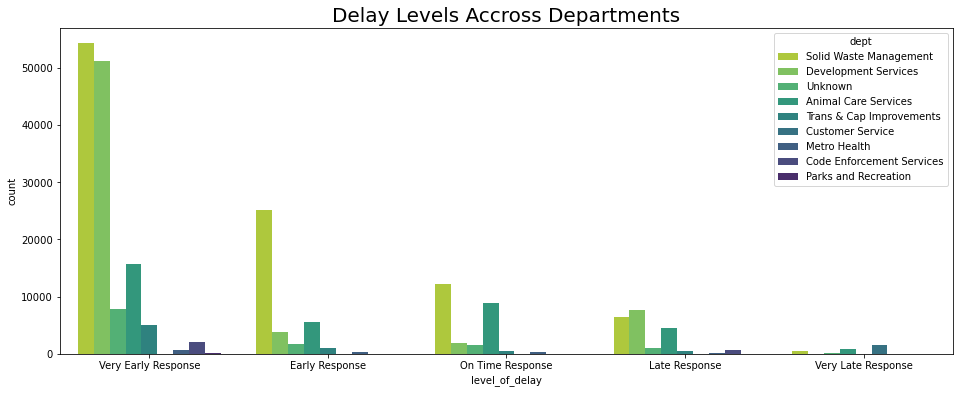

In [8]:
explore.plot_response_by_dept(train)

#### Takeaways:
- There is a spike for field and customer service calls in the very late delay level.
- There is a jump in code call reasons in the late delay level.

___

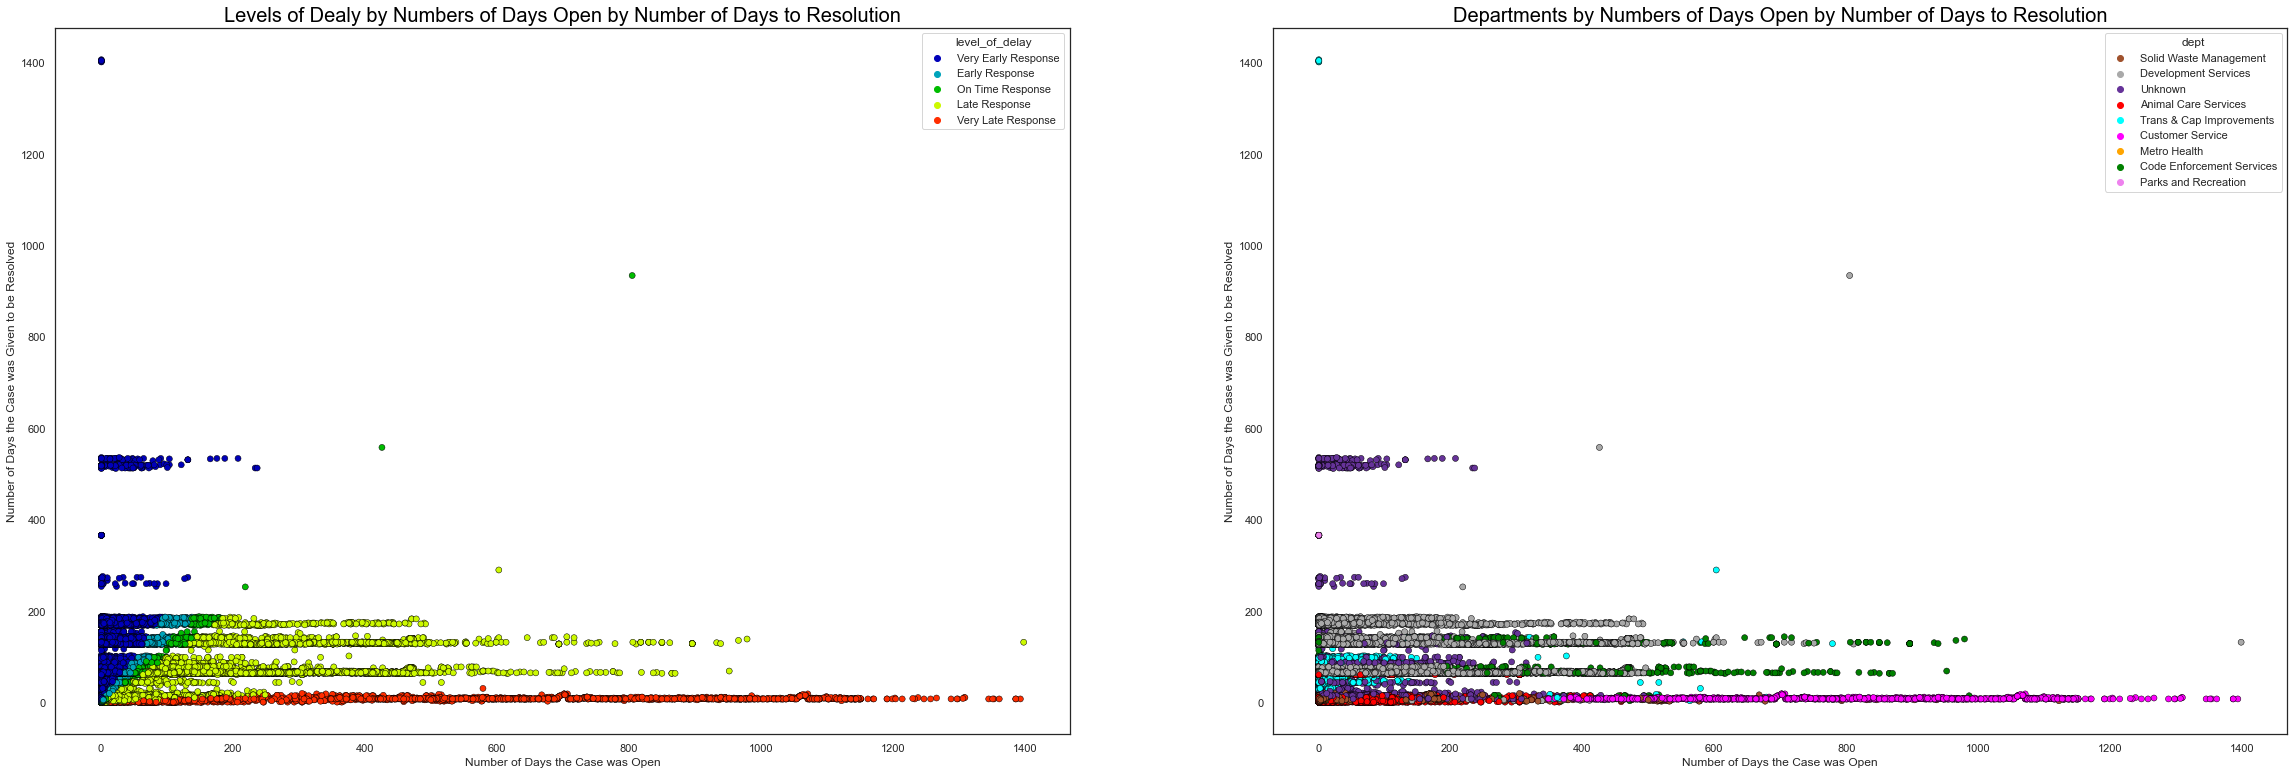

In [9]:
explore.plot_open_vs_resolve(train)

#### Takeaways:
- It seems that a majority of the "Very Late" responses are given minimal number of days (usually 0) to be completed
    - When compared to the second plot we can see a large portion of these are made by the "Customer Service" department followed by "Animal Services".
        - Animal services and Customer Serviceshould be investigated to see why so many cases are given 0 days to complete but can take months upon months to actually close.

___

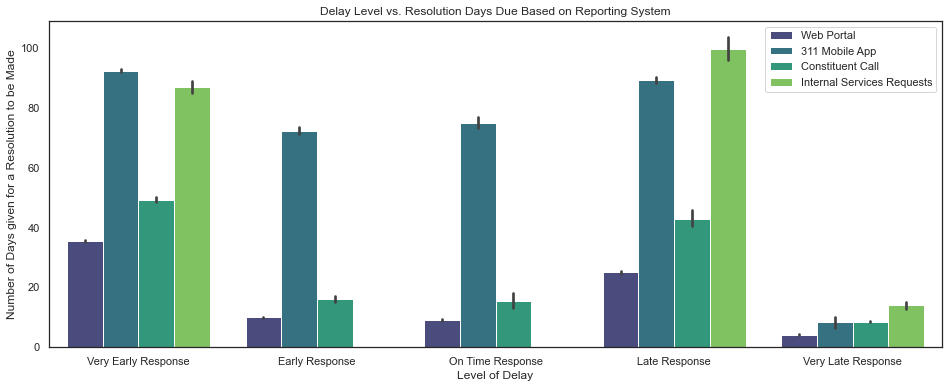

In [10]:
explore.plot_source_resolution_days(train)

#### Takeaways:
- Internal services are only ever late, or very late.
    - We wonder why cases that were reported from a San Antonio employee are not taken care of similarly to those made by web portal, call, or through the mobile app?
    - Why are internal requests given so many days on average to be completed but are still being completed later than any other reporting system?
- Mobile app reports tend to have way more given days on average for a resolution to happen.
    - Why is it that reports over the mobile app are being given significantly more time on average to be resolved?

___

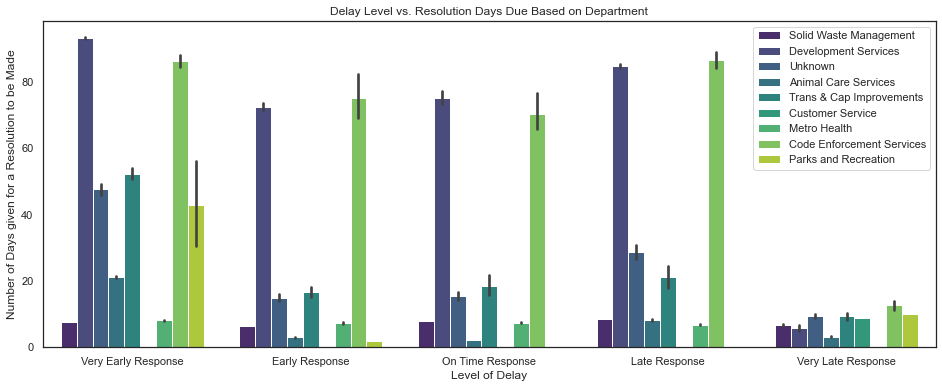

In [11]:
explore.plot_dept_resolution_days(train)

#### Takeaways:
- Developmental Services and Code enforcement give significantly more time to complete a case on average when compared to other departments.
- Very late cases usually are being given a lot less time on average to be completed throughout each department.
- Solid waste management seems to be even distributed in average days given throughout each level of delay. 

### <span style='color:black'> <span style='background :turquoise' > Call Volumes and Response Times by Department

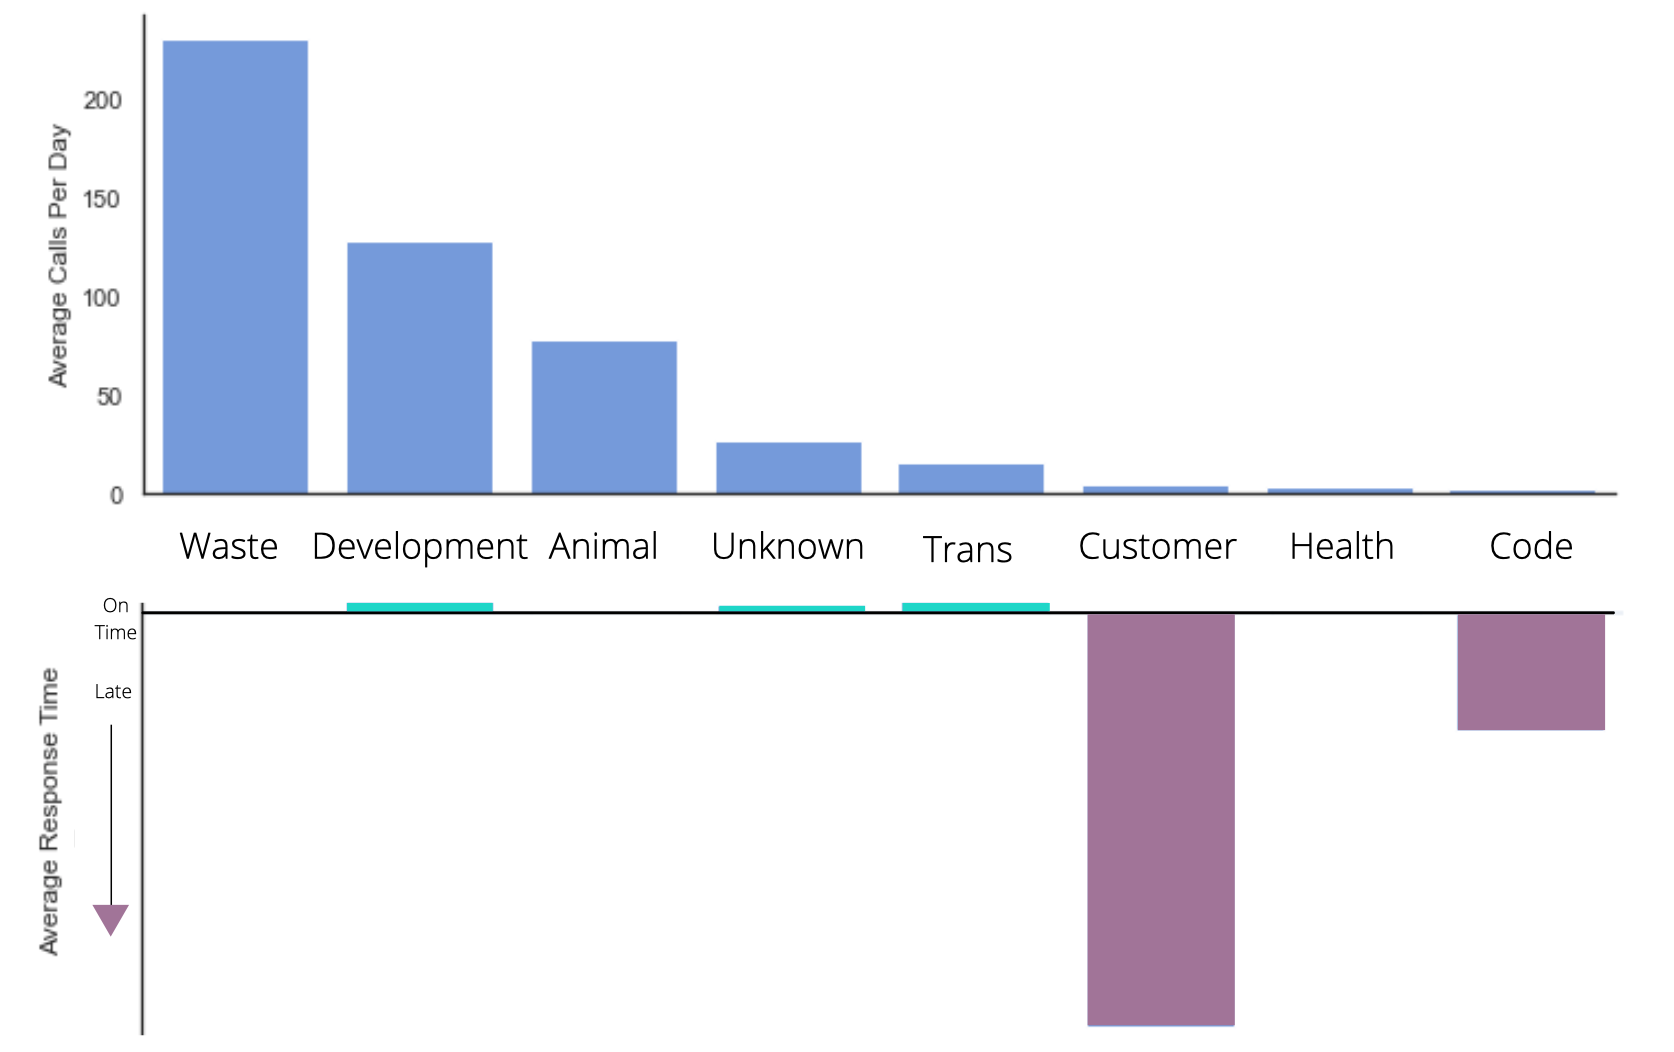

#### Takeaways:
- The most called on departments are Waste Management, Development Services, and Animal Care Services
- High call volume departments have a response time that is before or at the due date
- Customer Service and Code Enforcement fall behind in response time

### <span style='color:black'> <span style='background :turquoise' > Call Volumes and Response Times by Month

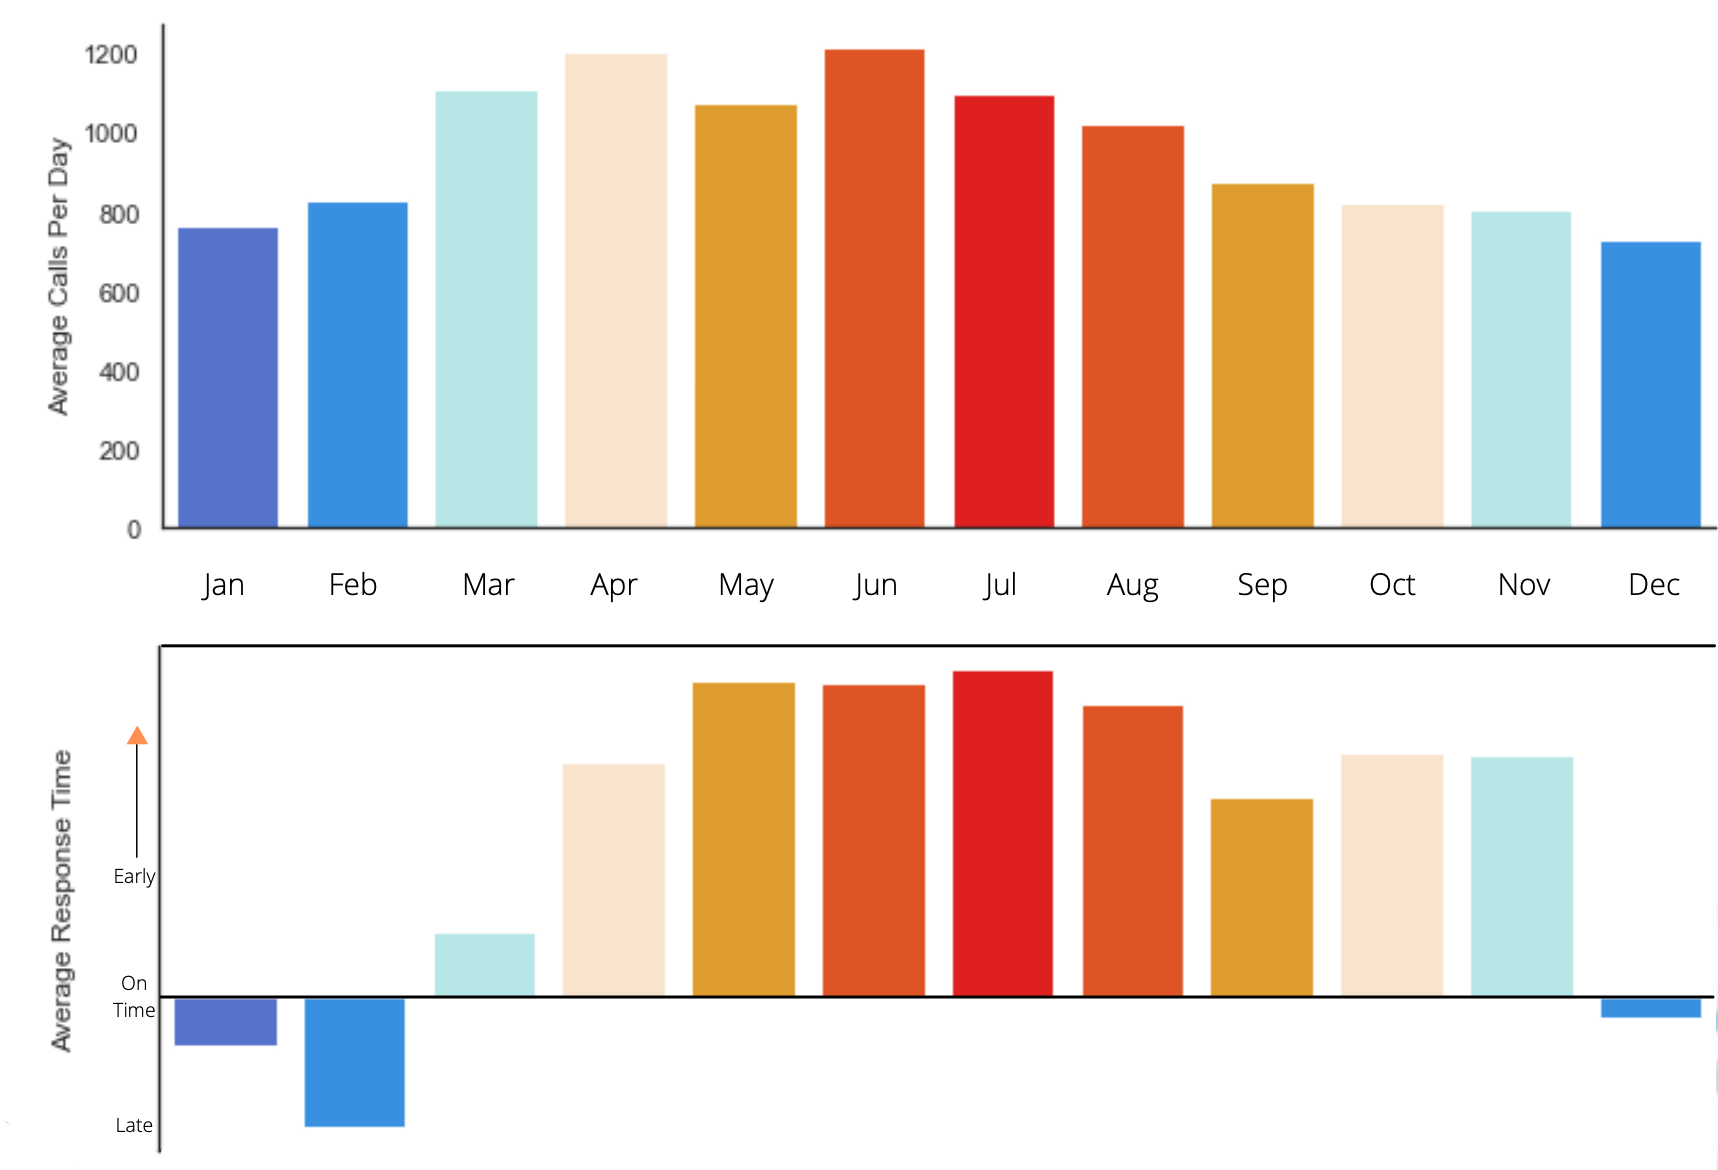

#### Takeaways:
- Call volume drops during the Fall and Winter months
- Response time also drops during the Fall and Winter months

### <span style='color:black'> <span style='background :turquoise' > How Seasonality Affects Call Proportions by Department

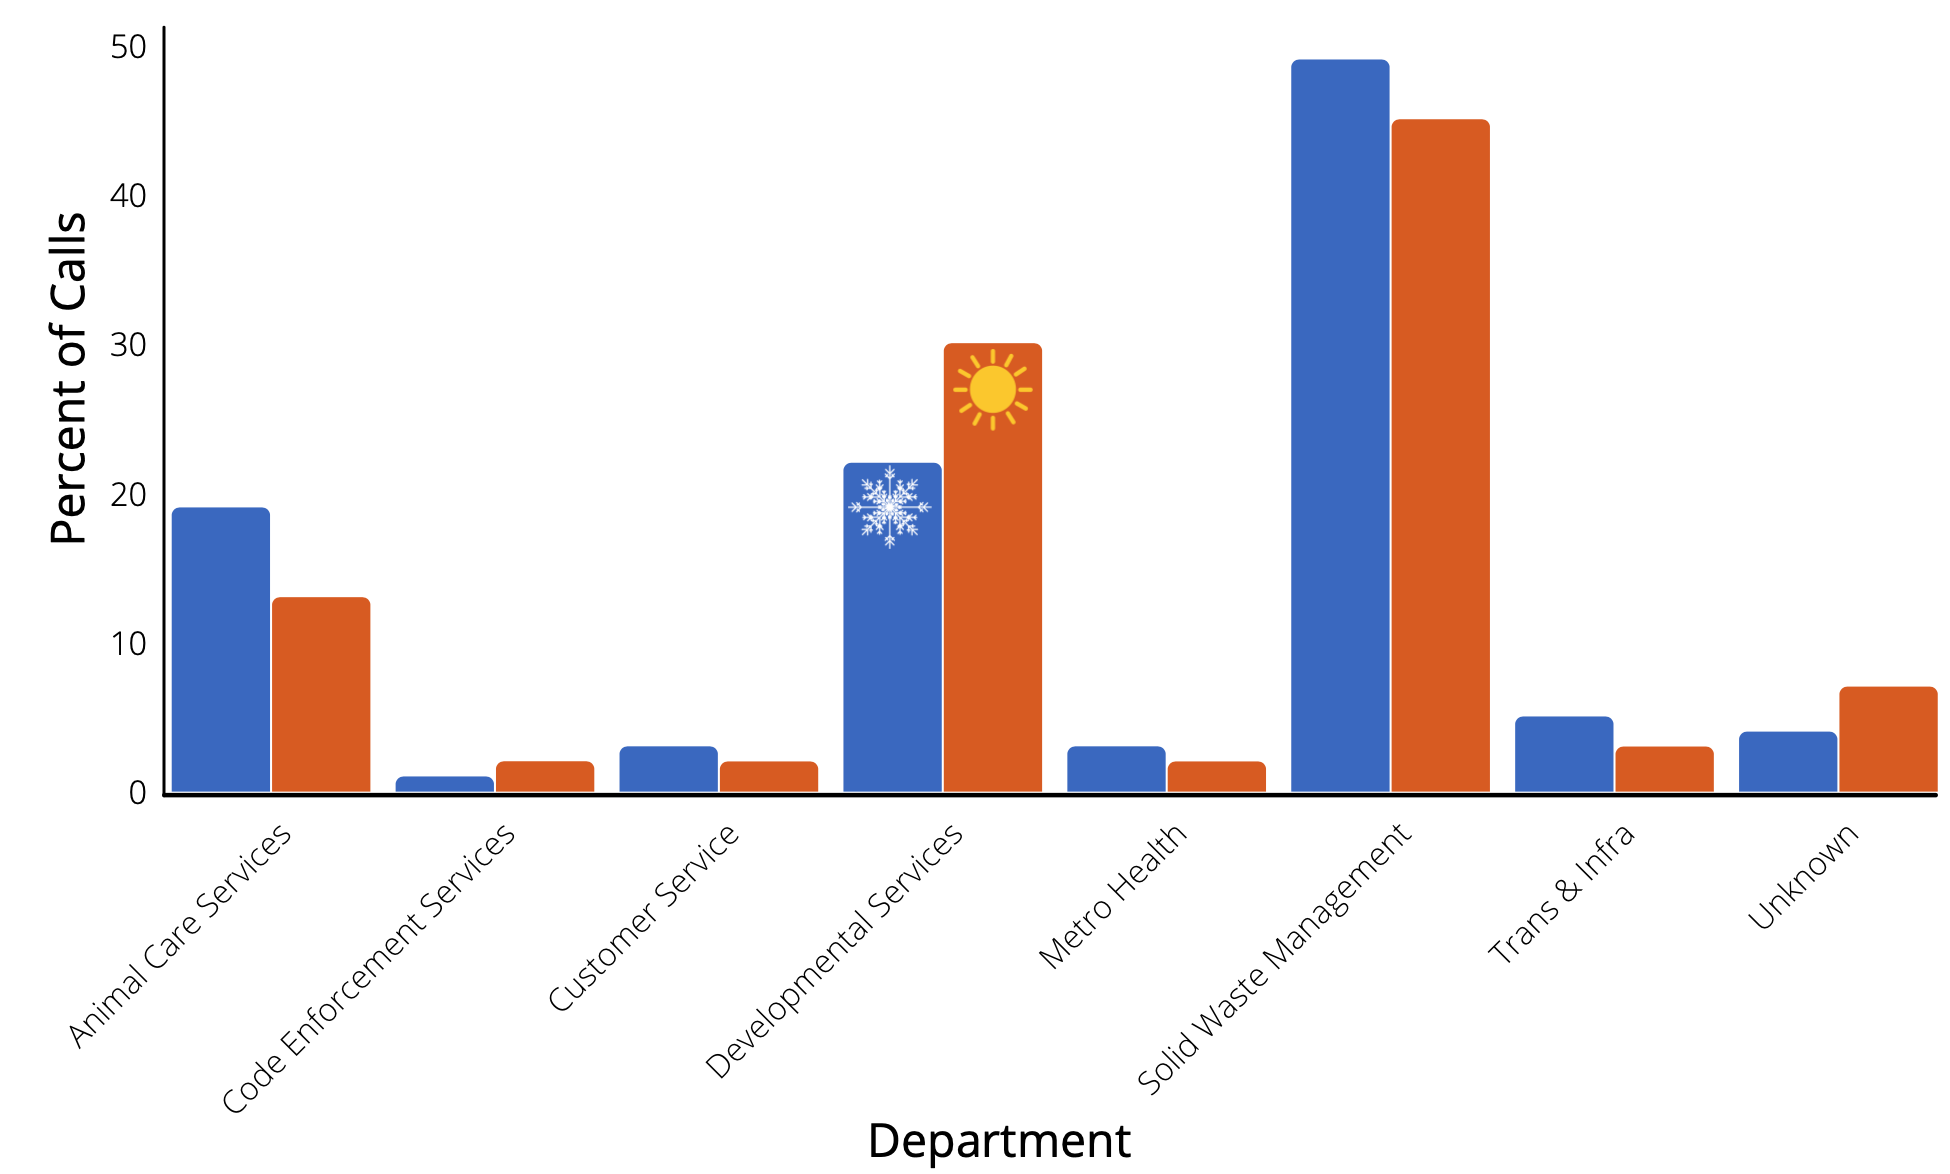

#### Takeaways:
- Animal Care Services has a larger proportion of calls during the Fall and Winter months
- Development Services has a larger proportion of calls during the Spring and Summer months

### <span style='color:black'> <span style='background :turquoise' > Breakdown of Average Response Time by District

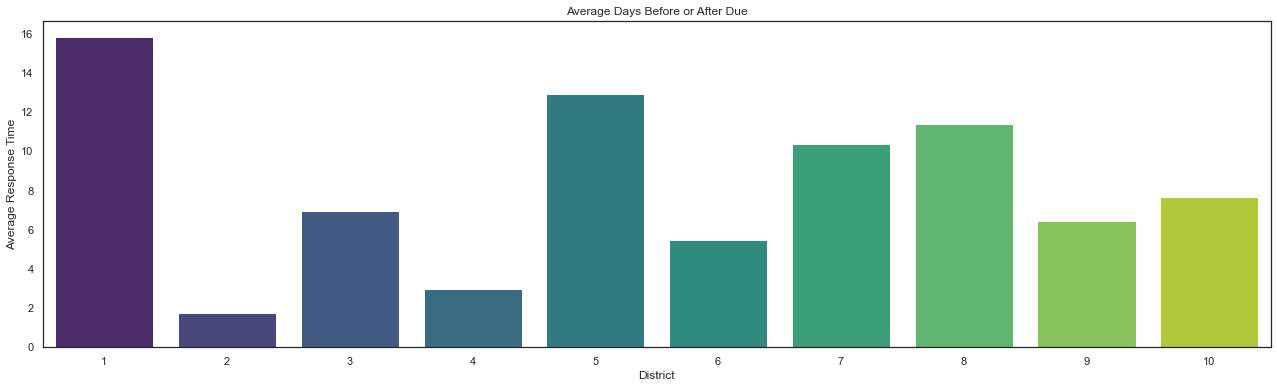

In [26]:
explore.avg_days_by_district(train)

#### Takeaways:
- Response time is the worst in districts 2 and 4
- District 1 clearly has the best response time

___

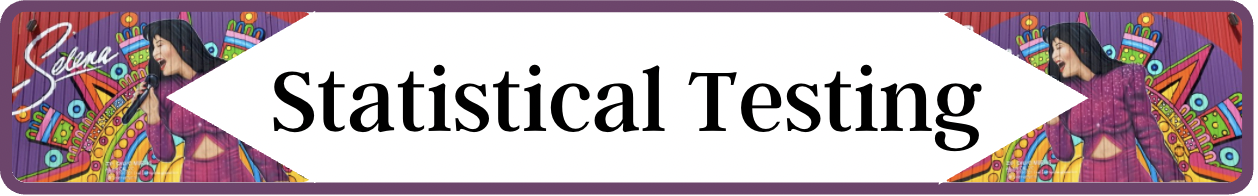

*Statistical testing code can also be found in the explore.py file*

## <span style='color:black'> <span style='background :turquoise' >  Is there a significant difference between districts for days before or after due date?
    

$H_0$: There is no difference in days before or after due date between the districts.

$H_a$: There is a significant difference in days before or after due date between the districts.


In [12]:
dbad_anova_test(train)

We reject the null hypothesis that there is no difference in days before or after due date between the districts.


## <span style='color:black'> <span style='background :turquoise' > Is there a significant difference between the call reason and level of delay?
    

$H_0$: "The call reason of the issue and the level of delay are independent from each other"
    
$H_a$: "The call reason and the level of delay are dependent from one another."
    
We reject the null hypothesis.  The call reason and the level of delay are dependent from one another.

In [13]:
chi2(train,'call_reason', 'level_of_delay', alpha=0.05)

chi^2 = 81236.5187
p     = 0.0000

The p-value: 0.0 is less than alpha: 0.05, we can reject the null hypothesis


## <span style='color:black'> <span style='background :turquoise' > Is there a difference for response time for all districts that fall below 20,000 per capita income and those that are above?
  
$H_0$: There is no difference between districts that fall below 20,000 per capita income and districts that fall above 20,000 per capita income response time.
    
$H_a$: There is a difference between districts that fall below 20,000 per capita income and districts that fall above 20,000 per capita income response time.

In [14]:
upper_lower_mw_testing(train)

We reject the null hypothesis that there is no difference between districts that fall below 20,000 per capita income and districts that fall above 20,000 per capita income response time.


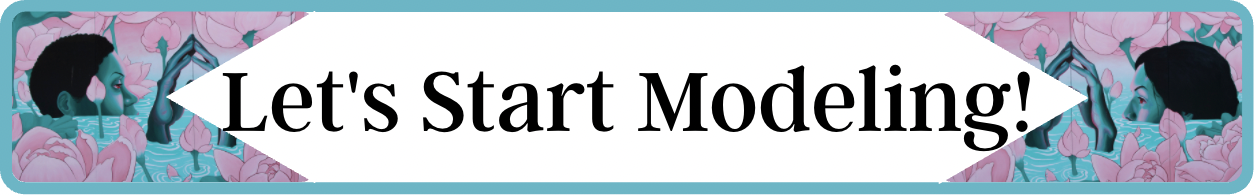

*All of the code used in the modeling section is in the model.py file on GitHub*

In [1]:
from model import model_df, split_separate_scale

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import RidgeClassifier, RidgeClassifierCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import export_graphviz

In [2]:
df = model_df()

train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test, train_scaled, validate_scaled, test_scaled = split_separate_scale(df)

### <span style='color:black'> <span style='background :turquoise' >Finding Baseline Accuracy

In [3]:
# look at values of target variable
y_train.value_counts()

Very Early Response    114280
Early Response          36971
On Time Response        24417
Late Response           20935
Very Late Response       3207
Name: level_of_delay, dtype: int64

In [6]:
# set up as dataframes
y_train = pd.DataFrame(dict(actual=y_train))
y_validate = pd.DataFrame(dict(actual=y_validate))
y_test = pd.DataFrame(dict(actual=y_test))

# 'Extremely Early Response' is by far the most frequent value so that will be our baseline
y_train['baseline'] = 'Very Early Response'

# calculate accuracy of baseline
baseline_accuracy = accuracy_score(y_train.actual, y_train.baseline)
print(' Baseline Accuracy: {:.2%}'.format(accuracy_score(y_train.actual, y_train.baseline)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(y_train.baseline, y_train.actual))
print('---')
print(classification_report(y_train.actual, y_train.baseline))

 Baseline Accuracy: 57.19%
---
Confusion Matrix
actual               Very Early Response  Early Response  On Time Response  \
baseline                                                                     
Very Early Response               114280           36971             24417   

actual               Late Response  Very Late Response  
baseline                                                
Very Early Response          20935                3207  
---
                     precision    recall  f1-score   support

     Early Response       0.00      0.00      0.00     36971
      Late Response       0.00      0.00      0.00     20935
   On Time Response       0.00      0.00      0.00     24417
Very Early Response       0.57      1.00      0.73    114280
 Very Late Response       0.00      0.00      0.00      3207

           accuracy                           0.57    199810
          macro avg       0.11      0.20      0.15    199810
       weighted avg       0.33      0.57      0.42  

### <span style='color:black'> <span style='background :turquoise' >Classification Report Information (Optional)

In [7]:
# calculate accuracy of baseline
baseline_accuracy = accuracy_score(y_train.actual, y_train.baseline)
print(' Baseline Accuracy: {:.2%}'.format(accuracy_score(y_train.actual, y_train.baseline)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(y_train.baseline, y_train.actual))
print('---')
print(classification_report(y_train.actual, y_train.baseline))

 Baseline Accuracy: 57.19%
---
Confusion Matrix
actual               Very Early Response  Early Response  On Time Response  \
baseline                                                                     
Very Early Response               114280           36971             24417   

actual               Late Response  Very Late Response  
baseline                                                
Very Early Response          20935                3207  
---
                     precision    recall  f1-score   support

     Early Response       0.00      0.00      0.00     36971
      Late Response       0.00      0.00      0.00     20935
   On Time Response       0.00      0.00      0.00     24417
Very Early Response       0.57      1.00      0.73    114280
 Very Late Response       0.00      0.00      0.00      3207

           accuracy                           0.57    199810
          macro avg       0.11      0.20      0.15    199810
       weighted avg       0.33      0.57      0.42  

### Takeaways

- Baseline accuracy is 57.19%, which means we can assume approx 1/2 of cases are resolved very early

- Our goal will be to outperform this baseline

### <span style='color:black'> <span style='background :turquoise' >Logistic Regression Model Informaiton
    
#### Default Parameters / Best Features

- The first model we looked at was logistic regression

- Various iterations were made, but the logistic regression model that worked the best turned out to be a model using default parameters and the top 8 features chosed by select k best

In [8]:
log_features = ['resolution_days_due', 'customer_services', 'development_services', 'solid_waste_management', 'customer_service', 'field', '311_mobile_app', 'open_year']
# make logistic regression object
log = LogisticRegression(random_state=123)
# fit logistic regression object to data
log.fit(train_scaled[log_features], y_train.actual)
# calculate probability
log_pred_proba = log.predict_proba(train_scaled[log_features])
# make predictions
y_train['log_pred'] = log.predict(train_scaled[log_features])
y_validate['log_pred'] = log.predict(validate_scaled[log_features])
y_test['log_pred'] = log.predict(test_scaled[log_features])

# calculate accuracy of log on train
log_accuracy_train = accuracy_score(y_train.actual, y_train.log_pred)                                     
print(' log Accuracy: {:.5%}'.format(accuracy_score(y_train.actual, y_train.log_pred)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(y_train.log_pred, y_train.actual))
print('---')
print(classification_report(y_train.actual, y_train.log_pred))

 log Accuracy: 58.02813%
---
Confusion Matrix
actual               Very Early Response  Early Response  On Time Response  \
log_pred                                                                     
Very Early Response               114280           36971             24417   
Very Late Response                     0               0                 0   

actual               Late Response  Very Late Response  
log_pred                                                
Very Early Response          20926                1541  
Very Late Response               9                1666  
---
                     precision    recall  f1-score   support

     Early Response       0.00      0.00      0.00     36971
      Late Response       0.00      0.00      0.00     20935
   On Time Response       0.00      0.00      0.00     24417
Very Early Response       0.58      1.00      0.73    114280
 Very Late Response       0.99      0.52      0.68      3207

           accuracy                      

### <span style='color:black'> <span style='background :turquoise' >Decision Tree Model Information
    
#### Deeper Max Depth - Selected Features

- Next we looked at the Decision Tree model

- The best iteration of this model was found by doubling the max depth parameter as well as only incorporating features we found to be significant

In [9]:
# make seperate df by removing incompatible features 
dt_train = X_train.drop(columns = ['dept', 'call_reason', 
        'source_id', 'council_district', 'open_date'])
dt_validate = X_validate.drop(columns = ['dept', 'call_reason', 
        'source_id', 'council_district', 'open_date'])
dt_test = X_test.drop(columns = ['dept', 'call_reason', 
        'source_id', 'council_district', 'open_date'])

#make the thing
clf = DecisionTreeClassifier(max_depth=6, random_state=123)
#fit the thing
clf = clf.fit(dt_train, y_train.actual)
#predicitons
y_train['dt_pred'] = clf.predict(dt_train)
y_validate['dt_pred'] = clf.predict(dt_validate)
y_test['dt_pred'] = clf.predict(dt_test)

# calculate accuracy of dt on train
dt_accuracy_train = accuracy_score(y_train.actual, y_train.dt_pred)                                     
print(' DT Accuracy: {:.5%}'.format(accuracy_score(y_train.actual, y_train.dt_pred)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(y_train.dt_pred, y_train.actual))
print('---')
print(classification_report(y_train.actual, y_train.dt_pred))

 DT Accuracy: 67.24638%
---
Confusion Matrix
actual               Very Early Response  Early Response  On Time Response  \
dt_pred                                                                      
Early Response                      1464           10565              4489   
Late Response                        202             355               697   
On Time Response                       0               0              4473   
Very Early Response               112614           26051             14758   
Very Late Response                     0               0                 0   

actual               Late Response  Very Late Response  
dt_pred                                                 
Early Response                1627                 347  
Late Response                 4649                 411  
On Time Response               581                 114  
Very Early Response          14077                 271  
Very Late Response               1                2064  
---
     

### <span style='color:black'> <span style='background :turquoise' >KNN Model Information
    
#### Uniform Weight / Best Features

- Next we looked at KNN Models

- The model that performed the best was a model using uniform weight and selecting features that were found to be significant according to select k best

In [10]:
#Features I want to train on
features1 = ['resolution_days_due', 'customer_services', 'development_services', 'solid_waste_management', 'customer_service', 'field', '311_mobile_app', 'open_year']
#make model
#weights = ['uniform', 'density']
knn = KNeighborsClassifier(n_neighbors=6, weights='uniform')
#fit model
knn.fit(X_train[features1], y_train.actual)
#predicitons
y_train['knn_pred'] = knn.predict(X_train[features1])
y_validate['knn_pred'] = knn.predict(X_validate[features1])
y_test['knn_pred'] = knn.predict(X_test[features1])
#estimate probability
knn_pred_proba = knn.predict_proba(X_train[features1])

# calculate accuracy of knn on train
knn_accuracy_train = accuracy_score(y_train.actual, y_train.knn_pred)                                     
print(' KNN Accuracy: {:.5%}'.format(accuracy_score(y_train.actual, y_train.knn_pred)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(y_train.knn_pred, y_train.actual))
print('---')
print(classification_report(y_train.actual, y_train.knn_pred))

 KNN Accuracy: 59.51204%
---
Confusion Matrix
actual               Very Early Response  Early Response  On Time Response  \
knn_pred                                                                     
Early Response                      4836           11540              5180   
Late Response                       4597             747               687   
On Time Response                    9610            3460              7404   
Very Early Response                95178           21212             11144   
Very Late Response                    59              12                 2   

actual               Late Response  Very Late Response  
knn_pred                                                
Early Response                1974                 321  
Late Response                 2782                  23  
On Time Response              3131                 432  
Very Early Response          13025                 424  
Very Late Response              23                2007  
---
    

### <span style='color:black'> <span style='background :turquoise' >Random Forest Model Information
    
#### Increased Max Depth & Min Samples / Best Features

- Next we moved on to Random Forest modeling

- The best version of this model we found was when we increased the max depth and min samples leaf paramaters and used feature engineering to determine the best features 

In [11]:
# make seperate df by removing incompatible features 
rf_train = X_train.drop(columns = ['dept', 'call_reason', 
        'source_id', 'council_district', 'open_date'])
rf_validate = X_validate.drop(columns = ['dept', 'call_reason', 
        'source_id', 'council_district', 'open_date'])
rf_test = X_test.drop(columns = ['dept', 'call_reason', 
        'source_id', 'council_district', 'open_date'])

# make list of features to use
features = ['resolution_days_due', 'code_enforcement_services','customer_services',
                                       'development_services','solid_waste_management',
                                       'open_week']

#make the thing
rf = RandomForestClassifier(max_depth = 10, min_samples_leaf = 3, random_state=123)
#fit the thing
rf = rf.fit(rf_train[features], y_train.actual)
#predicitons
y_train['rf_pred'] = rf.predict(rf_train[features])
y_validate['rf_pred'] = rf.predict(rf_validate[features])
y_test['rf_pred'] = rf.predict(rf_test[features])

# calculate accuracy of rf on train
rf_accuracy_train = accuracy_score(y_train.actual, y_train.rf_pred)                                     
print(' RF Accuracy: {:.5%}'.format(accuracy_score(y_train.actual, y_train.rf_pred)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(y_train.rf_pred, y_train.actual))
print('---')
print(classification_report(y_train.actual, y_train.rf_pred))

 RF Accuracy: 65.77699%
---
Confusion Matrix
actual               Very Early Response  Early Response  On Time Response  \
rf_pred                                                                      
Early Response                      1295           10237              4126   
Late Response                        285             124               226   
On Time Response                     354             467              5602   
Very Early Response               112343           26143             14462   
Very Late Response                     3               0                 1   

actual               Late Response  Very Late Response  
rf_pred                                                 
Early Response                1400                 328  
Late Response                 1640                  12  
On Time Response               991                 352  
Very Early Response          16902                 908  
Very Late Response               2                1607  
---
     

### <span style='color:black'> <span style='background :turquoise' >Ridge Classifier Model Information
    
#### Default Parameters / Selected Features 

- Next we looked into the Ridge Classifier model

- The best version of this model we found was using default parameters and our selected features ### <span style='color:black'> <span style='background :turquoise' >Ridge Classifier Model Information

In [12]:
#make the thing
rc = RidgeClassifier(random_state=123)
#fit the thing
rc = rc.fit(train_scaled, y_train.actual)
#predicitons
y_train['rc_pred'] = rc.predict(train_scaled)
y_validate['rc_pred'] = rc.predict(validate_scaled)
y_test['rc_pred'] = rc.predict(test_scaled)

# calculate accuracy of rc on train
rc_accuracy_train = accuracy_score(y_train.actual, y_train.rc_pred)                                     
print(' RC Accuracy: {:.5%}'.format(accuracy_score(y_train.actual, y_train.rc_pred)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(y_train.rc_pred, y_train.actual))
print('---')
print(classification_report(y_train.actual, y_train.rc_pred))

 RC Accuracy: 58.30989%
---
Confusion Matrix
actual               Very Early Response  Early Response  On Time Response  \
rc_pred                                                                      
Early Response                        82              57                37   
Late Response                        197              52                34   
On Time Response                      88             113               208   
Very Early Response               113910           36749             24138   
Very Late Response                     3               0                 0   

actual               Late Response  Very Late Response  
rc_pred                                                 
Early Response                  25                   6  
Late Response                  727                 327  
On Time Response               123                  50  
Very Early Response          20056                1217  
Very Late Response               4                1607  
---
     

### <span style='color:black'> <span style='background :turquoise' > SGD Classifier Model Information
    
#### Penalty Adjusted to l1 - Selected Features 

- Lastly we attempted to used an SGD Classifier model

- The version of this model we found to be the best was adjusting the penalty to l1 and using our selected 

In [13]:
#make the thing
sgd = SGDClassifier(max_iter=1000, tol=1e-3, random_state=123, penalty='l1')
#fit the thing
sgd = sgd.fit(train_scaled, y_train.actual)
#predicitons
y_train['sgd_pred'] = sgd.predict(train_scaled)
y_validate['sgd_pred'] = sgd.predict(validate_scaled)
y_test['sgd_pred'] = sgd.predict(test_scaled)

# calculate accuracy of sgd on train
sgd_accuracy_train = accuracy_score(y_train.actual, y_train.sgd_pred)                                     
print(' SGD Accuracy: {:.5%}'.format(accuracy_score(y_train.actual, y_train.sgd_pred)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(y_train.sgd_pred, y_train.actual))
print('---')
print(classification_report(y_train.actual, y_train.sgd_pred))

 SGD Accuracy: 58.83990%
---
Confusion Matrix
actual               Very Early Response  Early Response  On Time Response  \
sgd_pred                                                                     
Early Response                       136             107               108   
Late Response                        498             275               366   
On Time Response                     578             564              1177   
Very Early Response               112871           35794             22463   
Very Late Response                   197             231               303   

actual               Late Response  Very Late Response  
sgd_pred                                                
Early Response                  36                   1  
Late Response                  765                  37  
On Time Response               546                  44  
Very Early Response          18985                 477  
Very Late Response             603                2648  
---
    

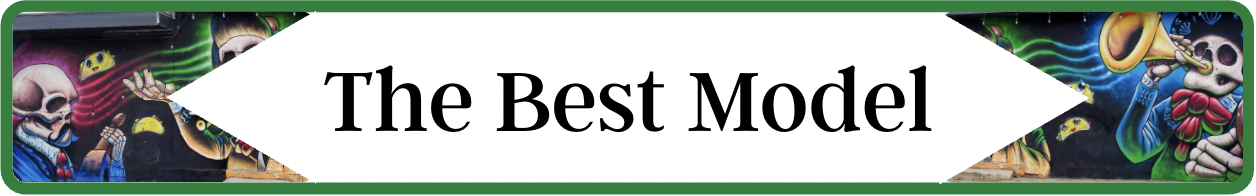

In [14]:
print(' Baseline Accuracy: {:.5%}'.format(baseline_accuracy))
print(' Log Accuracy: {:.5%}'.format(log_accuracy_train))
print(' DT Accuracy: {:.5%}'.format(dt_accuracy_train))
print(' KNN Accuracy: {:.5%}'.format(knn_accuracy_train))
print(' RF Accuracy: {:.5%}'.format(rf_accuracy_train))
print(' RC Accuracy: {:.5%}'.format(rc_accuracy_train))
print(' SGD Accuracy: {:.5%}'.format(sgd_accuracy_train))

 Baseline Accuracy: 57.19433%
 Log Accuracy: 58.02813%
 DT Accuracy: 67.24638%
 KNN Accuracy: 59.51204%
 RF Accuracy: 65.77699%
 RC Accuracy: 58.30989%
 SGD Accuracy: 58.83990%


### <span style='color:black'> <span style='background :turquoise' > We ended up using the Decision Tree model.
    
Beacause it had the highest accuracy, recall, and precision on test and unseen validate data.

In [15]:
# calculate accuracy of dt on validate
dt_accuracy_validate = accuracy_score(y_validate.actual, y_validate.dt_pred)                                     
print(' DT Accuracy: {:.5%}'.format(accuracy_score(y_validate.actual, y_validate.dt_pred)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(y_validate.dt_pred, y_validate.actual))
print('---')
print(classification_report(y_validate.actual, y_validate.dt_pred))

 DT Accuracy: 67.33853%
---
Confusion Matrix
actual               Very Early Response  Early Response  On Time Response  \
dt_pred                                                                      
Early Response                       655            4659              1930   
Late Response                         79             161               308   
On Time Response                       0               0              1892   
Very Early Response                48244           11025              6334   
Very Late Response                     0               0                 0   

actual               Late Response  Very Late Response  
dt_pred                                                 
Early Response                 737                 149  
Late Response                 1995                 175  
On Time Response               253                  44  
Very Early Response           5987                 132  
Very Late Response               0                 874  
---
     

In [16]:
# calculate accuracy of dt on test
dt_accuracy_test = accuracy_score(y_test.actual, y_test.dt_pred)                                     
print(' DT Accuracy: {:.5%}'.format(accuracy_score(y_test.actual, y_test.dt_pred)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(y_test.dt_pred, y_test.actual))
print('---')
print(classification_report(y_test.actual, y_test.dt_pred))

 DT Accuracy: 67.23140%
---
Confusion Matrix
actual               Very Early Response  Early Response  On Time Response  \
dt_pred                                                                      
Early Response                       552            3865              1641   
Late Response                         84             135               230   
On Time Response                       0               0              1578   
Very Early Response                40179            9204              5271   
Very Late Response                     0               0                 0   

actual               Late Response  Very Late Response  
dt_pred                                                 
Early Response                 592                 116  
Late Response                 1614                 139  
On Time Response               198                  48  
Very Early Response           5072                 101  
Very Late Response               1                 741  
---
     

#### Takeaways:
- Decision Tree model performed best beating our baseline by 10%.

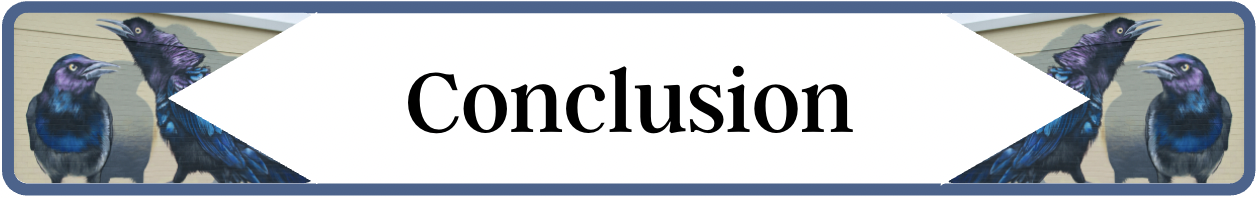

### <span style='color:black'> <span style='background :turquoise' >What we found... </span>

- Each department is better in certain areas about being on time/early and late in others.

- The more calls a department had the better they were at getting issues resolved on time.

- Internal requests were generally late in comparison to other forms of reporting.

- When an issue was reported via the app, there were no extremely late responses.

- Customer Service generally got issues resolved late or very late. 

- Animal Services usually only gave a day to complete a case and those cases usually took months to close.

- Winter months tend to have the longest average days open time, while Autumn months have the shortest.

### <span style='color:black'> <span style='background :turquoise' >With further time... </span>
- Overall extremely late responses are spread out throughout the city. There is a significant delay within calls listed as on time. 
Therefore, we would like to evaluate the amount of time between districts for calls that were considered on time. 
- Analyze the data further through time series analysis. Some questions that we would like to investigate are:
    - Do days of the week effect when the case was done?
    - Are Mondays the slowest days because of the weekend backlog?
    - Do minor holidays affect response time?
- Obtain census data to gain insight more into zip codes, neighborhoods, and demographics beyond just the large districts.
- Determine priority level for each call as a feature based on the number of days given and department to explore if there is a correlation with the level of delay.


### <span style='color:black'> <span style='background :turquoise' >We recommend...</span>
    
- The City of San Antonio should create standardized timelines for each department to follow when solving cases.
- Animal Care Services and Customer Service should both have a thorough review of their cases and timelines to rectify latency issues.
- Late and extremely late cases should be investigated through all departments.
- The classification in the raw data set for whether a case was completed late or not needs to be re-made. This is due to an issue where this feature classifies cases as being late when they were completed as late. For example if a case was due in fifteen days but was completed a day before its due date, it would be classified as late.

___

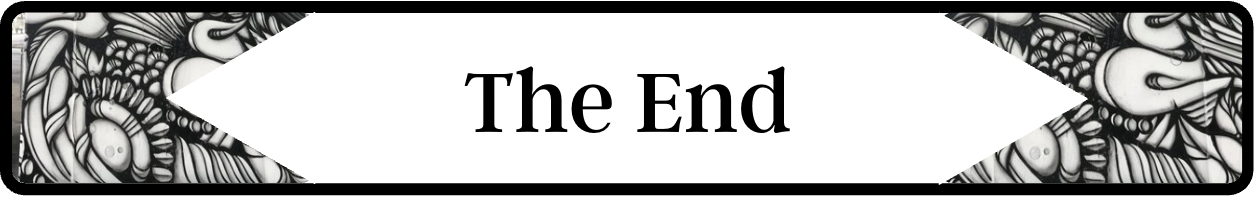

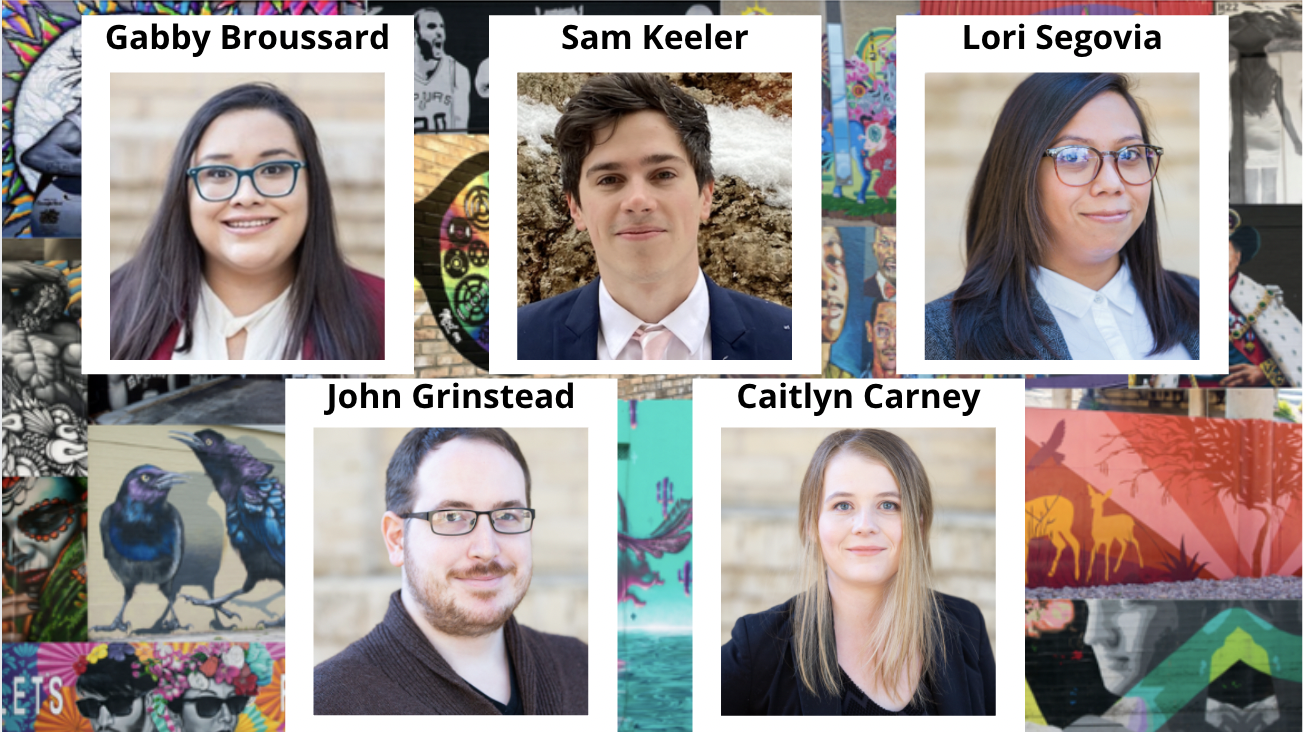